# Microsoft Malware detection

## 1.Business/Real-world Problem

### 1.1. What is Malware? 

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

### 1.2. Problem Statement

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


### 1.3 Source/Useful Links

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

### 1.4. Real-world/Business objectives and constraints.


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

## 2. Machine Learning Problem

### 2.1. Data

### 2.1.1. Data Overview

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

### 2.1.2. Example Data Point

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

## 2.2. Mapping the real-world problem to an ML problem

### 2.2.1. Type of Machine Learning Problem

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

### 2.2.2 Performance metric

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 



### 2.2.3 Machine Learning Objectives and Constraints

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

## 2.3. Train and Test Dataset

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively.

## 2.4. Useful blogs, videos and reference papers

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

## 3. Extracting the byte files from train.7z file

In [ ]:
!pip install kaggle
from google.colab import files
from datetime import datetime
api_token = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -rf sample_data/

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c 'malware-classification'

  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 35.1MB/s]
100% 17.5G/17.5G [04:57<00:00, 58.7MB/s]
100% 17.5G/17.5G [04:57<00:00, 63.3MB/s]
100% 17.8G/17.8G [05:12<00:00, 79.0MB/s]
100% 17.8G/17.8G [05:12<00:00, 61.0MB/s]
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 61.3MB/s]
100% 4.06M/4.06M [00:00<00:00, 31.0MB/s]



In [ ]:
# Keep only train.7z, trainLables files remove other files as shown below
!rm test.7z
!rm sampleSubmission.csv.zip
!rm dataSample.7z

In [ ]:
#Count the number of byte files and asm files in train data
data=!7z l train.7z
print(len(data))
print(type(data))

21759
<class 'IPython.utils.text.SList'>


In [ ]:
byte_file_list=[]
asm_file_list=[]
for i in data:
  if (i.endswith("bytes")):
    byte_file_list.append(i)
  elif (i.endswith("asm")):
    asm_file_list.append(i)

In [ ]:
print('Number of Byte files',len(byte_file_list))

Number of Byte files 10868


In [ ]:
print('Number of ASM files',len(asm_file_list))

Number of ASM files 10868


In [ ]:
byte_file_list[0]

'2015-01-29 05:00:00 ....A      5256192               train/01azqd4InC7m9JpocGv5.bytes'

In [ ]:
# Removing extra character and to get only the file name
byte_file_name=[]
for i in range(0,len(byte_file_list)):
  byte_file_name.append(byte_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
byte_file_name[:3]

['01azqd4InC7m9JpocGv5.bytes',
 '01IsoiSMh5gxyDYTl4CB.bytes',
 '01jsnpXSAlgw6aPeDxrU.bytes']

In [ ]:
# Finding only the file names of ASM files and storing the file names in an array
asm_file_name=[]
for i in range(0,len(asm_file_list)):
  asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
asm_file_name[:3]

['01azqd4InC7m9JpocGv5.asm',
 '01IsoiSMh5gxyDYTl4CB.asm',
 '01jsnpXSAlgw6aPeDxrU.asm']

In [ ]:
import os
# Getting the current working directory
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'trainLabels.csv', 'kaggle.json', 'train.7z']

In [ ]:
#To download all the byte files from train.7z and below code will take almost 15mins.
start=datetime.now()

!7z e train.7z -o/content/bytefiles *.bytes -r

end=datetime.now()
difference=end-start
print('Time taken to extract all the byte files',difference)


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18810691091 bytes (18 GiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 18810691091
Headers Size = 339764
Method = LZMA:24
Solid = +
Blocks = 94

  0%      0% . train/kQEbWRHa04gOYDqM1NJ6.asm                                       0% 1 . train/KqEgONxfHdP5lLaBIGQk.asm                                         0% 2 . train/kqiOdVbRQlB2s907GLMv.asm                                         0% 5 . train/kQsiVxDbAXt23wRWal57.asm           

In [ ]:
print('Number of byte files extracted is',len(os.listdir('bytefiles/')))

Number of byte files extracted is 10868


In [ ]:
#https://www.thepythoncode.com/article/get-directory-size-in-bytes-using-python

def get_directory_size(directory):
    """Returns the `directory` size in bytes."""
    total = 0
    try:
        # print("[+] Getting the size of", directory)
        for entry in os.scandir(directory):
            if entry.is_file():
                # if it's a file, use stat() function
                total += entry.stat().st_size
            elif entry.is_dir():
                # if it's a directory, recursively call this function
                total += get_directory_size(entry.path)
    except NotADirectoryError:
        # if `directory` isn't a directory, get the file size then
        return os.path.getsize(directory)
    except PermissionError:
        # if for whatever reason we can't open the folder, return 0
        return 0
    return total

In [ ]:
def get_size_format(b, factor=1024, suffix="B"):
    """
    Scale bytes to its proper byte format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

In [ ]:
get_size_format(get_directory_size("bytefiles/"))

'47.36GB'

In [ ]:
#https://stackoverflow.com/questions/52265978/how-to-delete-a-locally-uploaded-file-on-google-colab
!rm train.7z

In [ ]:
os.listdir()

['.config', 'bytefiles', 'trainLabels.csv', 'kaggle.json']

## 4. Extracting 5000 byte files from train.7z file

I am using only 5000 byte files for extracting bigrams due to computation limitations.

In [ ]:
#https://stackoverflow.com/a/54763845
byte_delete = os.listdir('bytefiles')[0:5868] #Deleting 5000 files
for file_ in byte_delete:
  os.remove(os.path.join('bytefiles',file_))

In [ ]:
print('Number of byte files extracted is',len(os.listdir('bytefiles/')))

Number of byte files extracted is 5000


In [ ]:
get_size_format(get_directory_size("bytefiles/"))

'21.70GB'

In [ ]:
trimmed_byte_files= set()
for file in os.listdir('bytefiles'):
  if file.endswith(".bytes"):
    trimmed_byte_files.update(file)

len(trimmed_byte_files)

63

In [ ]:
byte_file_name[:5]

['01azqd4InC7m9JpocGv5.bytes',
 '01IsoiSMh5gxyDYTl4CB.bytes',
 '01jsnpXSAlgw6aPeDxrU.bytes',
 '01kcPWA9K2BOxQeS5Rju.bytes',
 '01SuzwMJEIXsK7A8dQbl.bytes']

In [ ]:
len(byte_file_name)

10868

In [ ]:
labels_df = pd.read_csv("trainLabels.csv")
labels_df.head(3)

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1

In [ ]:
len(os.listdir('bytefiles'))

5000

In [ ]:
os.listdir('bytefiles')

['HFmO61wz0XELgktWIaRl.bytes',
 'hWrFmiajeZ8bENA2sydM.bytes',
 '0OQ9MEykugoYZJrnj64d.bytes',
 'gdmNQEslb8Hut9fyw5VS.bytes',
 'C3Rd8zrwsm1FeSWhou4v.bytes',
 'd5y31iXUNopBAjIEtklH.bytes',
 'hjI9pimf05cxRBaKw18s.bytes',
 'AXKWcOFlx5MNa7L6Rr4q.bytes',
 'EhSAMWFg7Uk5oqBfNlcC.bytes',
 'eu5p80LQma3sw2OhkiZ1.bytes',
 '6gObYqkiQC8R5ptdr9UN.bytes',
 'jAPy1K0O2qwrC4VDgUGt.bytes',
 'f0jhPJ2913c56yY4mwEi.bytes',
 'CVdMjEq54K19x2JFWpXe.bytes',
 'HngN1QsVwobWqJB3RXCz.bytes',
 'foMDRra3h1u8Q6SiXsYE.bytes',
 'l1OdNtIKM8Gi6jowZHg3.bytes',
 'He4qRW17SQlfN9BcAExX.bytes',
 '1GqxsQhZ3FutTnbgHpAf.bytes',
 'fwBR5vEgIxeXmhQrs1o3.bytes',
 'J1chft4QPrzWisaqREj8.bytes',
 'fpub5iWnCYX8oeFvElkK.bytes',
 'I0tk2asbMQNo9G8Bw6Sr.bytes',
 'f1Zy0M3PrxVHzEksOaG5.bytes',
 'B0REvwUqT4QIh8pinM1f.bytes',
 'cIoDLZzPdTiQBpCjW2Ab.bytes',
 'Fu6jQNrclwCs38MSZKUx.bytes',
 'DaRMwOQZm3zStcEGYxgK.bytes',
 'IuPbVhUqrzvp2oTKMsDg.bytes',
 'hvnbNWILJC0gj57wy8KM.bytes',
 'ecd3A46BQyk2SFJ7IMqb.bytes',
 'AcgCHa4oQx3q8XvijZrL.bytes',
 'FqbIWS

In [ ]:
if '01azqd4InC7m9JpocGv5.bytes' in os.listdir('bytefiles/'):
  print('Value is present')
else:
  print("Value is not present")

Value is present


In [ ]:
list_of_files = os.listdir('bytefiles/')
print(list_of_files)

['HFmO61wz0XELgktWIaRl.bytes', 'hWrFmiajeZ8bENA2sydM.bytes', '0OQ9MEykugoYZJrnj64d.bytes', 'gdmNQEslb8Hut9fyw5VS.bytes', 'C3Rd8zrwsm1FeSWhou4v.bytes', 'd5y31iXUNopBAjIEtklH.bytes', 'hjI9pimf05cxRBaKw18s.bytes', 'AXKWcOFlx5MNa7L6Rr4q.bytes', 'EhSAMWFg7Uk5oqBfNlcC.bytes', 'eu5p80LQma3sw2OhkiZ1.bytes', '6gObYqkiQC8R5ptdr9UN.bytes', 'jAPy1K0O2qwrC4VDgUGt.bytes', 'f0jhPJ2913c56yY4mwEi.bytes', 'CVdMjEq54K19x2JFWpXe.bytes', 'HngN1QsVwobWqJB3RXCz.bytes', 'foMDRra3h1u8Q6SiXsYE.bytes', 'l1OdNtIKM8Gi6jowZHg3.bytes', 'He4qRW17SQlfN9BcAExX.bytes', '1GqxsQhZ3FutTnbgHpAf.bytes', 'fwBR5vEgIxeXmhQrs1o3.bytes', 'J1chft4QPrzWisaqREj8.bytes', 'fpub5iWnCYX8oeFvElkK.bytes', 'I0tk2asbMQNo9G8Bw6Sr.bytes', 'f1Zy0M3PrxVHzEksOaG5.bytes', 'B0REvwUqT4QIh8pinM1f.bytes', 'cIoDLZzPdTiQBpCjW2Ab.bytes', 'Fu6jQNrclwCs38MSZKUx.bytes', 'DaRMwOQZm3zStcEGYxgK.bytes', 'IuPbVhUqrzvp2oTKMsDg.bytes', 'hvnbNWILJC0gj57wy8KM.bytes', 'ecd3A46BQyk2SFJ7IMqb.bytes', 'AcgCHa4oQx3q8XvijZrL.bytes', 'FqbIWSJMyRK1Ni7tVAuO.bytes', 'iWXubQ6n

In [ ]:
if 'CBZdlHELuV4rTPSb0sNM.bytes' in list_of_files:
  print("Yp we have it")
else:
  print("Nope, not there")

Nope, not there


In [ ]:
if 'cCtXa0KsdmPuFIgfBN9M.bytes' in list_of_files:
  print("Yp we have it")
else:
  print("Nope, not there")

Nope, not there


In [ ]:
len(list_of_files)

5000

In [ ]:
if '02JqQ7H3yEoD8viYWlmS.bytes' in list_of_files:
  print("Yp we have it")
else:
  print("Nope, not there")

Nope, not there


In [ ]:
if '05EeG39MTRrI6VY21DPd.bytes' in list_of_files:
  print("Yp we have it")
else:
  print("Nope, not there")

Yp we have it


In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10868 non-null  object
 1   Class   10868 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.9+ KB


In [ ]:
#https://www.datasciencemadesimple.com/append-a-character-or-string-to-the-column-in-pandas-python-2/#:~:text=dataframe%20will%20be-,Append%20a%20character%20or%20string%20to%20end%20of%20the%20column,%2B%E2%80%9D%20operator%20as%20shown%20below.
labels_df['complete_file_id'] = labels_df['Id'].astype(str)+'.bytes'
labels_df.head(10)

Id  Class            complete_file_id
0  01kcPWA9K2BOxQeS5Rju      1  01kcPWA9K2BOxQeS5Rju.bytes
1  04EjIdbPV5e1XroFOpiN      1  04EjIdbPV5e1XroFOpiN.bytes
2  05EeG39MTRrI6VY21DPd      1  05EeG39MTRrI6VY21DPd.bytes
3  05rJTUWYAKNegBk2wE8X      1  05rJTUWYAKNegBk2wE8X.bytes
4  0AnoOZDNbPXIr2MRBSCJ      1  0AnoOZDNbPXIr2MRBSCJ.bytes
5  0AwWs42SUQ19mI7eDcTC      1  0AwWs42SUQ19mI7eDcTC.bytes
6  0cH8YeO15ZywEhPrJvmj      1  0cH8YeO15ZywEhPrJvmj.bytes
7  0DNVFKwYlcjO7bTfJ5p1      1  0DNVFKwYlcjO7bTfJ5p1.bytes
8  0DqUX5rkg3IbMY6BLGCE      1  0DqUX5rkg3IbMY6BLGCE.bytes
9  0eaNKwluUmkYdIvZ923c      1  0eaNKwluUmkYdIvZ923c.bytes

In [ ]:
#https://stackoverflow.com/a/12065904
trimmed_labels_df = labels_df[labels_df['complete_file_id'].isin(list_of_files)]
trimmed_labels_df

Id  Class            complete_file_id
0      01kcPWA9K2BOxQeS5Rju      1  01kcPWA9K2BOxQeS5Rju.bytes
2      05EeG39MTRrI6VY21DPd      1  05EeG39MTRrI6VY21DPd.bytes
5      0AwWs42SUQ19mI7eDcTC      1  0AwWs42SUQ19mI7eDcTC.bytes
8      0DqUX5rkg3IbMY6BLGCE      1  0DqUX5rkg3IbMY6BLGCE.bytes
9      0eaNKwluUmkYdIvZ923c      1  0eaNKwluUmkYdIvZ923c.bytes
...                     ...    ...                         ...
10857  K7HTMuk6fo2wrhyWxY43      9  K7HTMuk6fo2wrhyWxY43.bytes
10858  k8qrhNTAG54fSl6jDtVa      9  k8qrhNTAG54fSl6jDtVa.bytes
10860  kAtomObScfxVW1DKXUla      9  kAtomObScfxVW1DKXUla.bytes
10861  kchO8uQA9Me4H3jZTSgm      9  kchO8uQA9Me4H3jZTSgm.bytes
10862  KF7NGoQSk8v9OE0nrwy2      9  KF7NGoQSk8v9OE0nrwy2.bytes

[5000 rows x 3 columns]

In [ ]:
#https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
trimmed_labels_df.to_csv('trimmed_labels.csv')

# 5. Assignments

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

<pre>
1. you need to donwload the train from kaggle, which is of size ~17GB, after extracting it will occupy ~128GB data your drive

2. if you are having computation power limitations, you can try using google colab, with GPU option enabled (you can search for how to enable GPU in colab) or you can work with the Google Cloud, check this tutorials by one of our student: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg (we suggest you to use GCP over Colab)

3. To Extract the .7z file in google cloud, once after you upload the file into server, in your ipython notebook create a new cell and write thess commands
  a. !sudo apt-get install p7zip
  b. !7z x file_name.7z -o path/where/you/want/to/extract
  
https://askubuntu.com/a/341637
</pre>

## 5.1 Calculate bigrams on byte files

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle as pkl
from scipy.sparse import csr_matrix
from tqdm import tqdm
import scipy.sparse
from sklearn.preprocessing import normalize
#https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb#scrollTo=eCo1lGY4UdF2
%matplotlib inline

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

byte_files = os.listdir('bytefiles')
filenames=[]
array=[]
for file in byte_files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('bytefiles/'+file+".txt", 'w+')
        with open('bytefiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('bytefiles/'+file+".bytes")
        text_file.close()

In [ ]:
total_keys = []
def calculate_bigrams(file):
    ngram_list = []
    with open('bytefiles/'+file,"r") as byte_flie:
        all_Lines = []
        for lines in byte_flie:
            line = lines.rstrip().split(" ")
            all_Lines.extend(line)
            #unigram
            for hex_code in line:
                ngram_list.append(hex_code.lower())
        ngram_list = list(set(ngram_list))
        #bigram
        bigram = [' '.join(x) for x in list(ngrams(all_Lines,2))]
        for hex_code in bigram:
            ngram_list.append(hex_code.lower())
        ngram_list = list(set(ngram_list))
    return ngram_list 

In [ ]:
from tqdm import tqdm
from nltk.util import ngrams
byte_files = os.listdir('bytefiles')
#applying calculate_bigrams function on all the byte files
for file in tqdm(byte_files):
    total_keys.extend(calculate_bigrams(file))
    total_keys = list(set(total_keys))

len(total_keys)

100%|██████████| 5000/5000 [2:18:46<00:00,  1.67s/it]


66302

In [ ]:
"""import pickle as pkl
with open('total_keys','wb') as f:
    pkl.dump(total_keys,f)"""

In [ ]:
from google.colab import files
total_keys_upload = files.upload()

Saving total_keys.pkl to total_keys.pkl


In [ ]:
#https://stackoverflow.com/a/49354664/10284547
import io
import pickle as pkl
total_keys = pkl.load(io.BytesIO(total_keys_upload['total_keys.pkl']))

In [ ]:
len(total_keys)

66302

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
import scipy.sparse
def bigram_features(files):
    process_id = os.getpid()
    print("Process id of the file is ",process_id)
    process_id_str = str(process_id)
    byte_files = os.listdir('bytefiles')
    bigram_vector = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary = total_keys)
    bigram_matrix = csr_matrix((len(byte_files),len(total_keys)))
    print("Bigram vectors are ","bigram_vector"+process_id_str)
    
    for i, file in tqdm(enumerate(byte_files)):
        fname = open('bytefiles/'+file)
        bigram_matrix[i,:]+=csr_matrix(bigram_vector.fit_transform([fname.read().replace('\n',' ').lower()]))
        fname.close()
    
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.save_npz.html
    bigram_files = 'bigram_features'+process_id_str+'.npz'
    scipy.sparse.save_npz(bigram_files,bigram_matrix)

In [ ]:
print(len(section1))
print(len(section2))

2500
2500


In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
from datetime import datetime
from multiprocessing import Pool, TimeoutError
import os
train_files = os.listdir('bytefiles')
half_files = int(len(train_files)/2)
section1 = train_files[:half_files]
section2 = train_files[half_files:]
total_train_files = [section1,section2]
pool = Pool(2)
pool.map(bigram_features, total_train_files)

Process id of the file is  1479
Process id of the file is  1480
Bigram vectors are  bigram_vector1479
Bigram vectors are  bigram_vector1480


5000it [7:00:48,  5.05s/it]
5000it [7:05:09,  5.10s/it]


Time taken to run this cell is  10:23:45.174040


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp bigram_features1479.npz '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 503278
-rw------- 1 root root 512580904 Mar 22 16:15 bigram_features1479.npz
-rw------- 1 root root   1202260 Mar 22 16:15 MMD_final_file.ipynb
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2 07:26 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
!cp bigram_features1480.npz '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 1003845
-rw------- 1 root root 512580904 Mar 22 16:16 bigram_features1480.npz
-rw------- 1 root root   1201926 Mar 22 16:15 MMD_final_file.ipynb
-rw------- 1 root root 512580904 Mar 22 16:15 bigram_features1479.npz
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2 07:26 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
bigram_features1479 = scipy.sparse.load_npz("/content/drive/MyDrive/Colab Notebooks/bigram_features1479.npz")

In [ ]:
from sklearn.preprocessing import normalize
all_features = normalize(bigram_features1479,axis=0)

In [ ]:
all_features

<5000x66302 sparse matrix of type '<class 'numpy.float64'>'
	with 232881372 stored elements in Compressed Sparse Column format>

In [ ]:
from google.colab import files
trimmed_labels = files.upload()

Saving trimmed_labels.csv to trimmed_labels.csv


In [ ]:
trimmed_labels = pd.read_csv('trimmed_labels.csv')
result_y = trimmed_labels['Class']

In [ ]:
#https://towardsdatascience.com/random-forest-for-feature-importance-ea90852b8fc5
def top_bigrams(data, bigrams, best_bigrams):
    model = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
    model.fit(data,result_y)
    bigram_array = np.array(bigrams)  #converting the bigrams to an ndarray
    #sorting the bigrams in descending order with bigrams having highest feature importance coming first
    top_bigram_indices = np.argsort(model.feature_importances_)[::-1]
    #Selecting the bigrams feature importance scores
    top_bigram_values = model.feature_importances_[top_bigram_indices[:20]]
    #Selecting the corresponding bigram names with highest values of feature importance scores
    top_bigram_names =  bigram_array[top_bigram_indices[:20]]
    return top_bigram_indices[:best_bigrams]

In [ ]:
bigrams_indices = top_bigrams(all_features,total_keys,2000)
bigrams_indices

array([35569, 26257, 53665, ..., 13670, 16490, 29168])

In [ ]:
bigrams_indices.shape

(2000,)

In [ ]:
"""import pickle as pkl
with open('bigrams_indices.pkl','wb') as f:
    pkl.dump(bigrams_indices,f)"""

In [ ]:
from google.colab import files
bigram_indices_upload = files.upload()

Saving bigrams_indices.pkl to bigrams_indices.pkl


In [ ]:
#https://stackoverflow.com/a/49354664/10284547
import io
import pickle as pkl
bigrams_indices = pkl.load(io.BytesIO(bigram_indices_upload['bigrams_indices.pkl']))

In [ ]:
len(bigrams_indices)

2000

In [ ]:
top_bigram_features = np.zeros((5000,0))
for i in bigrams_indices:
    all_features_array = all_features[:,i].todense()
    top_bigram_features = np.hstack([top_bigram_features,all_features_array])

In [ ]:
#m is the matrix top_bigram_features
bigrams_df = pd.DataFrame(top_bigram_features,columns = np.take(total_keys,bigrams_indices))
bigrams_df

00 00     00 4c     70 00  ...     93 52     8b ba     00 1d
0     0.003505  0.000094  0.000643  ...  0.000000  0.000524  0.000111
1     0.001596  0.000207  0.000321  ...  0.000000  0.000000  0.000111
2     0.000749  0.000170  0.000276  ...  0.003126  0.003145  0.000056
3     0.009493  0.001545  0.004914  ...  0.000782  0.003145  0.000557
4     0.003050  0.144150  0.008542  ...  0.001563  0.019920  0.010135
...        ...       ...       ...  ...       ...       ...       ...
4995  0.001525  0.000320  0.000781  ...  0.010161  0.005766  0.001615
4996  0.075341  0.022631  0.050886  ...  0.005471  0.007863  0.087369
4997  0.002906  0.000339  0.000873  ...  0.000782  0.000000  0.000947
4998  0.001660  0.000415  0.000873  ...  0.016413  0.006815  0.001169
4999  0.001409  0.000283  0.000735  ...  0.005471  0.004194  0.001503

[5000 rows x 2000 columns]

In [ ]:
top_bigram_features

matrix([[3.50486456e-03, 9.42159621e-05, 6.42959163e-04, ...,
         0.00000000e+00, 5.24218392e-04, 1.11369567e-04],
        [1.59624933e-03, 2.07275117e-04, 3.21479581e-04, ...,
         0.00000000e+00, 0.00000000e+00, 1.11369567e-04],
        [7.49212354e-04, 1.69588732e-04, 2.75553927e-04, ...,
         3.12632741e-03, 3.14531035e-03, 5.56847833e-05],
        ...,
        [2.90601227e-03, 3.39177463e-04, 8.72587435e-04, ...,
         7.81581852e-04, 0.00000000e+00, 9.46641317e-04],
        [1.66017176e-03, 4.14550233e-04, 8.72587435e-04, ...,
         1.64132189e-02, 6.81483910e-03, 1.16938045e-03],
        [1.40914033e-03, 2.82647886e-04, 7.34810472e-04, ...,
         5.47107296e-03, 4.19374714e-03, 1.50348915e-03]])

In [ ]:
bigrams_df.to_csv('bigrams_df.csv')

In [ ]:
!cp bigrams_df.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 1183440
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root   1283755 Mar 29 05:59 MMD_final_file.ipynb
-rw------- 1 root root 512580904 Mar 22 16:16 bigram_features1480.npz
-rw------- 1 root root 512580904 Mar 22 16:15 bigram_features1479.npz
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2 07:26 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
top_bigram_features2 = np.zeros((5000,0))
for i in bigrams_indices:
    all_features_array = bigram_features1479[:,i].todense()
    top_bigram_features2 = np.hstack([top_bigram_features2,all_features_array])

In [ ]:
bigrams_df2 = pd.DataFrame(top_bigram_features2,columns = np.take(total_keys,bigrams_indices))
bigrams_df2

00 00   00 4c   70 00   39 00  ...  a8 01  93 52  8b ba   00 1d
0      13543.0     5.0    14.0     2.0  ...  274.0    0.0    1.0     2.0
1       6168.0    11.0     7.0     0.0  ...    3.0    0.0    0.0     2.0
2       2895.0     9.0     6.0     2.0  ...    7.0    4.0    6.0     1.0
3      36683.0    82.0   107.0    62.0  ...   19.0    1.0    6.0    10.0
4      11787.0  7650.0   186.0   149.0  ...   19.0    2.0   38.0   182.0
...        ...     ...     ...     ...  ...    ...    ...    ...     ...
4995    5894.0    17.0    17.0    12.0  ...   12.0   13.0   11.0    29.0
4996  291123.0  1201.0  1108.0  1680.0  ...    8.0    7.0   15.0  1569.0
4997   11229.0    18.0    19.0     6.0  ...    5.0    1.0    0.0    17.0
4998    6415.0    22.0    19.0    15.0  ...   16.0   21.0   13.0    21.0
4999    5445.0    15.0    16.0    11.0  ...    8.0    7.0    8.0    27.0

[5000 rows x 2000 columns]

In [ ]:
bigrams_df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bigrams_df2.csv').drop("Unnamed: 0",axis=1)
bigrams_df2.head(2)

00 00  00 4c  70 00  39 00  08 00  ...  1c 00  a8 01  93 52  8b ba  00 1d
0  13543.0    5.0   14.0    2.0   47.0  ...   11.0  274.0    0.0    1.0    2.0
1   6168.0   11.0    7.0    0.0   50.0  ...   12.0    3.0    0.0    0.0    2.0

[2 rows x 2000 columns]

In [ ]:
bigrams_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bigrams_df.csv").drop("Unnamed: 0",axis=1)
bigrams_df.head(2)

00 00     00 4c     70 00     39 00  ...     a8 01  93 52     8b ba     00 1d
0  0.003505  0.000094  0.000643  0.000063  ...  0.005947    0.0  0.000524  0.000111
1  0.001596  0.000207  0.000321  0.000000  ...  0.000065    0.0  0.000000  0.000111

[2 rows x 2000 columns]

In [ ]:
bigrams_df2.to_csv('bigrams_df2.csv')

In [ ]:
!cp bigrams_df2.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 726459
-rw------- 1 root root  44630823 Mar 29 06:23 bigrams_df2.csv
-rw------- 1 root root   1285798 Mar 29 06:22 MMD_final_file.ipynb
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root 512580904 Mar 22 16:15 bigram_features1479.npz
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2 07:26 9_DonorsChoose_RF_GBDT.ipynb


### 5.1.1 Train Test split

In [ ]:
result_x = bigrams_df2
result_x.head(2)
#result_y = trimmed_labels['Class']

00 00  00 4c  70 00  39 00  08 00  ...  1c 00  a8 01  93 52  8b ba  00 1d
0  13543.0    5.0   14.0    2.0   47.0  ...   11.0  274.0    0.0    1.0    2.0
1   6168.0   11.0    7.0    0.0   50.0  ...   12.0    3.0    0.0    0.0    2.0

[2 rows x 2000 columns]

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 2000) (3200,)
(800, 2000) (800,)
(1000, 2000) (1000,)


In [ ]:
"""with open('X_train_merge.pkl','wb') as f:
    pkl.dump(X_train_merge,f)

with open('X_cv_merge.pkl','wb') as f:
    pkl.dump(X_cv_merge,f)

with open('X_test_merge.pkl','wb') as f:
    pkl.dump(X_test_merge,f)"""

I am using normalized values for linear based ML models like logistic regression, KNN. Therefore values being used for train test split are from the dataframe `bigrams_df`

In [ ]:
result_x_norm = bigrams_df
result_x_norm.head(2)
#result_y = trimmed_labels['Class']

00 00     00 4c     70 00     39 00  ...     a8 01  93 52     8b ba     00 1d
0  0.003505  0.000094  0.000643  0.000063  ...  0.005947    0.0  0.000524  0.000111
1  0.001596  0.000207  0.000321  0.000000  ...  0.000065    0.0  0.000000  0.000111

[2 rows x 2000 columns]

In [ ]:
X_train, X_test_norm, y_train, y_test_norm = train_test_split(result_x_norm, result_y,stratify=result_y,test_size=0.20)
X_train_norm, X_cv_norm, y_train_norm, y_cv_norm = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_norm.shape,y_train_norm.shape)
print(X_cv_norm.shape,y_cv_norm.shape)
print(X_test_norm.shape,y_test_norm.shape)

(3200, 2000) (3200,)
(800, 2000) (800,)
(1000, 2000) (1000,)


### 5.1.2 Random Model

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in recall matrix",A.sum(axis=1))

Log loss on Cross Validation Data using Random Model 2.4827794658519733
Log loss on Test Data using Random Model 2.4739377343186106
Number of misclassified points  88.2
-------------------------------------------------- Confusion matrix --------------------------------------------------


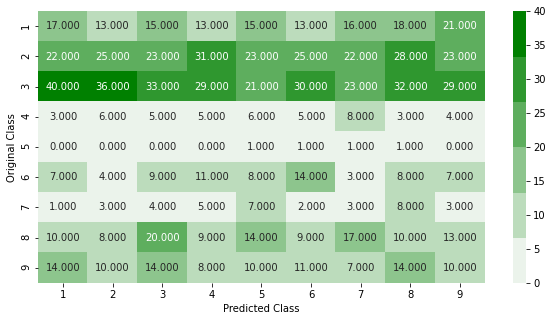

-------------------------------------------------- Precision matrix --------------------------------------------------


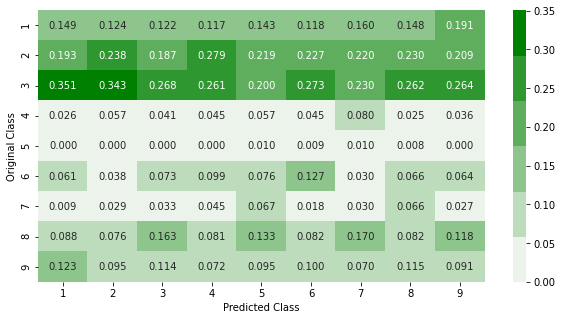

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


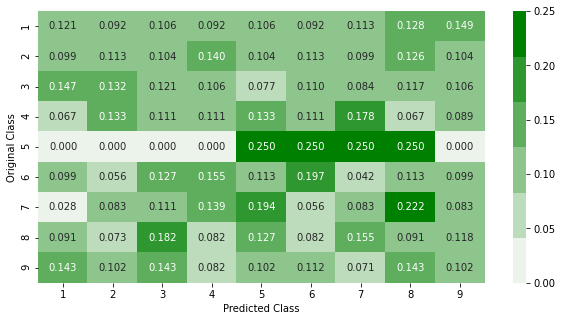

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test_merge.shape[0]
cv_data_len = X_cv_merge.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv_merge,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test_merge,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test_merge, predicted_y+1)

### 5.1.3 Random Forest Classifier

log_loss for c =  10 is 1.9032139100609238
log_loss for c =  50 is 1.9036529618168783
log_loss for c =  100 is 1.9054458619286612
log_loss for c =  500 is 1.9061603639025333
log_loss for c =  1000 is 1.9059095182095047
log_loss for c =  2000 is 1.905859431118265
log_loss for c =  3000 is 1.9057421178110723


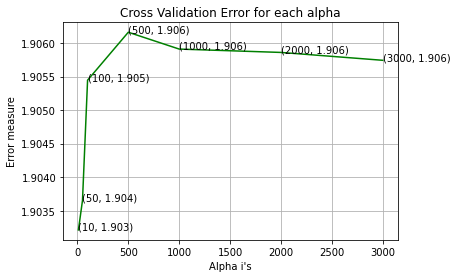

For values of best alpha =  10 The train log loss is: 1.9168691522718644
For values of best alpha =  10 The cross validation log loss is: 1.9032139100609238
For values of best alpha =  10 The test log loss is: 1.9059575331389778


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  72.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


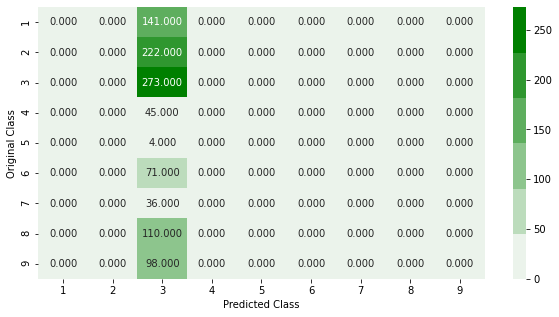

-------------------------------------------------- Precision matrix --------------------------------------------------


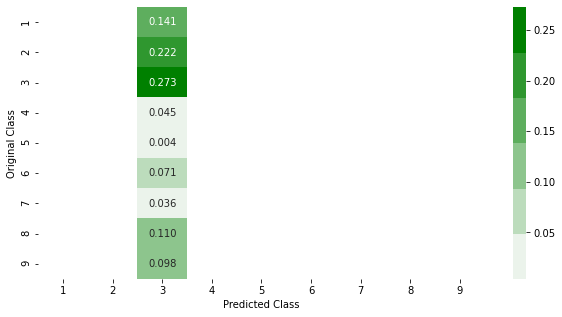

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


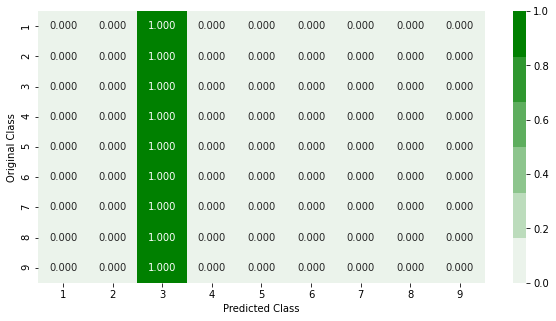

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.1.4 XGBoost Classifier

log_loss for c =  10 is 1.9018467514242547
log_loss for c =  100 is 1.898580342649662
log_loss for c =  500 is 1.8998375620899532
log_loss for c =  1000 is 1.901599971554591
log_loss for c =  2000 is 1.9045622287162296
log_loss for c =  3000 is 1.9052642433113232


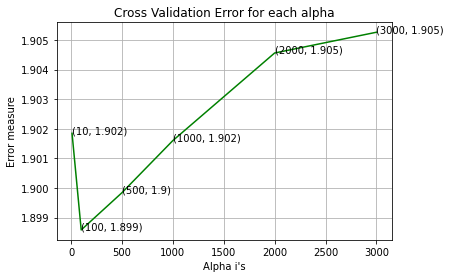

For values of best alpha =  100 The train log loss is: 1.8929665881630544
For values of best alpha =  100 The cross validation log loss is: 1.902954940267452
For values of best alpha =  100 The test log loss is: 1.905917265372104


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i, max_depth=1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1,max_depth = 1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

The above cell ran for 8hrs and 47 min before Google Colab timed out.

Number of misclassified points  72.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


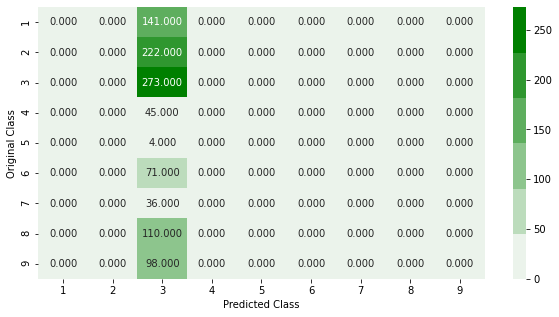

-------------------------------------------------- Precision matrix --------------------------------------------------


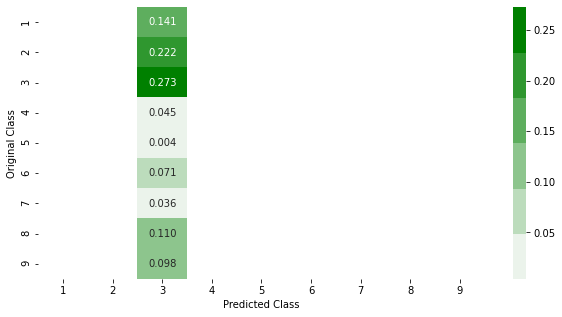

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


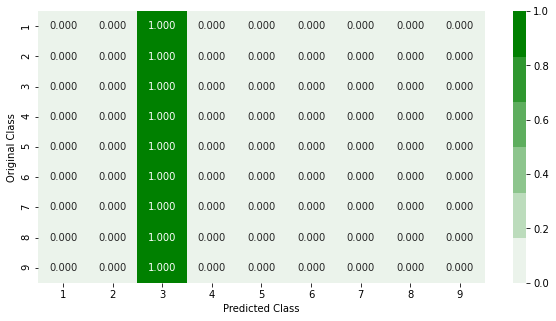

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.1.5 K Nearest Neighbour Classification

log_loss for k =  1 is 1.9040935948168303
log_loss for k =  3 is 1.90143992330949
log_loss for k =  5 is 1.9020564612226838
log_loss for k =  7 is 1.9014684074728303
log_loss for k =  9 is 1.9007871792625934
log_loss for k =  11 is 1.9019093178791275
log_loss for k =  13 is 1.8996223737180484


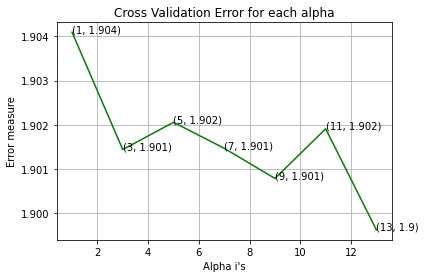

For values of best alpha =  13 The train log loss is: 1.8850040320623753
For values of best alpha =  13 The cross validation log loss is: 1.8996223737180484
For values of best alpha =  13 The test log loss is: 1.9058054028467322


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_norm,y_train_norm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train_norm)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    cv_log_error_array.append(log_loss(y_cv_norm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_norm,y_train_norm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_norm, y_train_norm)
    
predict_y = sig_clf.predict_proba(X_train_norm)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_norm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_norm, predict_y))
predict_y = sig_clf.predict_proba(X_test_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_norm, predict_y))

The above cell ran for 12 min 27 sec

Number of misclassified points  72.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


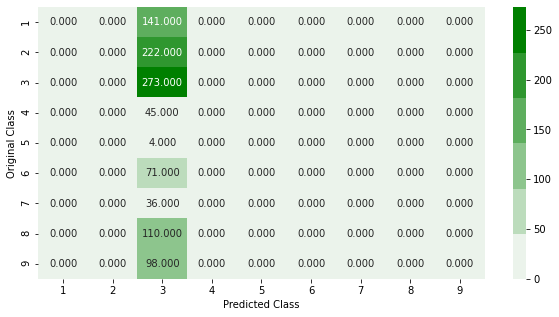

-------------------------------------------------- Precision matrix --------------------------------------------------


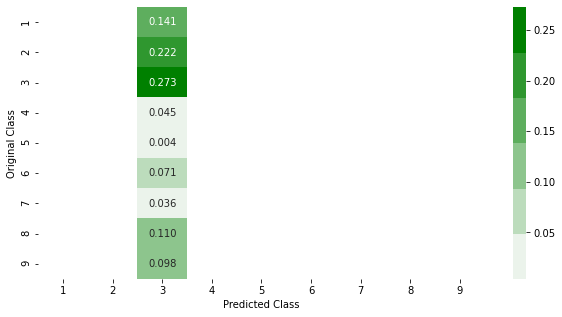

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


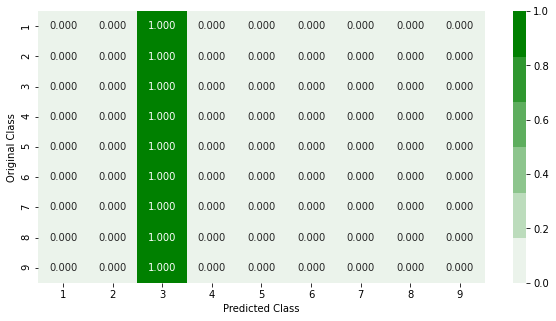

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_norm, sig_clf.predict(X_test_norm))

### 5.1.6 Logistic Regression

log_loss for c =  1e-05 is 1.9039235437530102
log_loss for c =  0.0001 is 1.9038984594587467
log_loss for c =  0.001 is 1.9039090398134428
log_loss for c =  0.01 is 1.904007720047602
log_loss for c =  0.1 is 1.9043175183197536
log_loss for c =  1 is 1.904939756622589
log_loss for c =  10 is 1.9053338194220135
log_loss for c =  100 is 1.9037858782832422
log_loss for c =  1000 is 1.9035550458849437


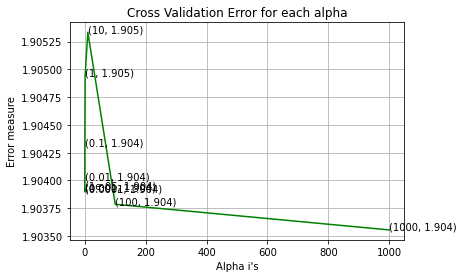

log loss for train data 1.9072868948867374
log loss for cv data 1.9035550458849437
log loss for test data 1.9067272791572683


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_norm,y_train_norm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train_norm)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    cv_log_error_array.append(log_loss(y_cv_norm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_norm,y_train_norm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_norm, y_train_norm)
pred_y=sig_clf.predict(X_test_norm)

predict_y = sig_clf.predict_proba(X_train_norm)
print ('log loss for train data',log_loss(y_train_norm, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_norm)
print ('log loss for cv data',log_loss(y_cv_norm, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_norm)
print ('log loss for test data',log_loss(y_test_norm, predict_y, labels=logisticR.classes_, eps=1e-15))

The above cell ran for 3.5 minutes

Number of misclassified points  72.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


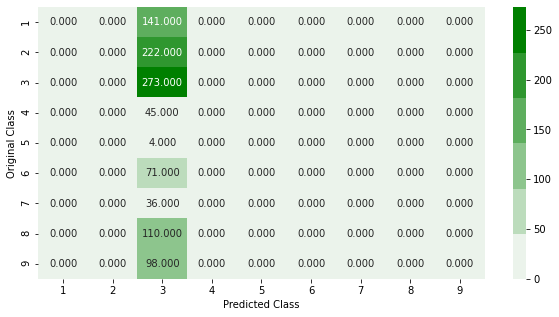

-------------------------------------------------- Precision matrix --------------------------------------------------


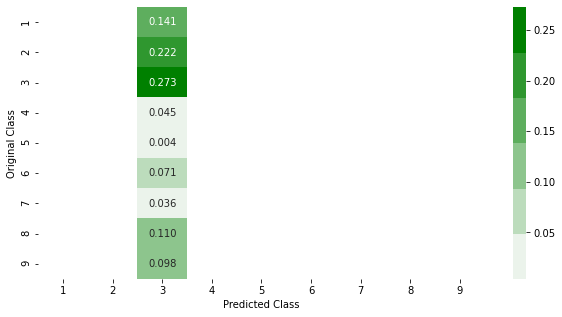

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


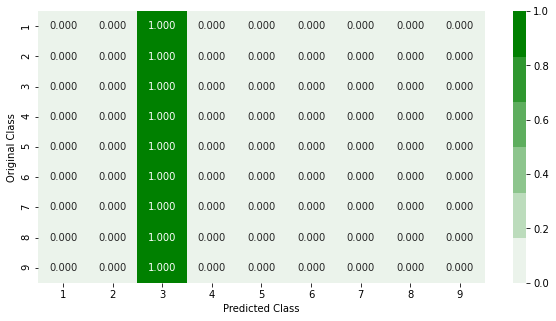

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_norm, sig_clf.predict(X_test_norm))

### Testing more features (5000 features)

In [ ]:
bigrams_indices2 = top_bigrams(all_features,total_keys,5000)
bigrams_indices2

array([35569, 64440, 16409, ..., 51977, 60638, 45539])

In [ ]:
bigrams_indices2.shape

(5000,)

In [ ]:
top_bigram_features2 = np.zeros((5000,0))
for i in bigrams_indices2:
    all_features_array = all_features[:,i].todense()
    top_bigram_features2 = np.hstack([top_bigram_features2,all_features_array])

In [ ]:
#m is the matrix top_bigram_features
test_df = pd.DataFrame(top_bigram_features2,columns = np.take(total_keys,bigrams_indices2))
test_df

00 00     ff ff     39 00  ...     d0 e8     19 1d     b3 b4
0     0.003505  0.000958  0.000063  ...  0.000000  0.000000  0.000000
1     0.001596  0.001915  0.000000  ...  0.001265  0.000000  0.000387
2     0.000749  0.000055  0.000063  ...  0.001897  0.000090  0.000580
3     0.009493  0.007164  0.001957  ...  0.005692  0.000036  0.000483
4     0.003050  0.004452  0.004703  ...  0.035418  0.000090  0.000870
...        ...       ...       ...  ...       ...       ...       ...
4995  0.001525  0.000372  0.000379  ...  0.004427  0.000126  0.001063
4996  0.075341  0.001324  0.053026  ...  0.002530  0.000072  0.000967
4997  0.002906  0.005863  0.000189  ...  0.005060  0.000000  0.000387
4998  0.001660  0.000366  0.000473  ...  0.009487  0.000470  0.001643
4999  0.001409  0.000094  0.000347  ...  0.008222  0.000253  0.001450

[5000 rows x 5000 columns]

In [ ]:
test_df.to_csv('test_df.csv')

In [ ]:
result_x = test_df
result_x.head(2)
#result_y = trimmed_labels['Class']

00 00     ff ff     39 00     56 53  ...  fa ec     d0 e8  19 1d     b3 b4
0  0.003505  0.000958  0.000063  0.000913  ...    0.0  0.000000    0.0  0.000000
1  0.001596  0.001915  0.000000  0.000562  ...    0.0  0.001265    0.0  0.000387

[2 rows x 5000 columns]

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 5000) (3200,)
(800, 5000) (800,)
(1000, 5000) (1000,)


log_loss for c =  1e-05 is 1.9040581867435316
log_loss for c =  0.0001 is 1.9040643609574408
log_loss for c =  0.001 is 1.9040526008178391
log_loss for c =  0.01 is 1.9039302238319562
log_loss for c =  0.1 is 1.9028919913306237
log_loss for c =  1 is 1.9014525994285685
log_loss for c =  10 is 1.9021025398272189
log_loss for c =  100 is 1.902860996938843
log_loss for c =  1000 is 1.9035626341050174


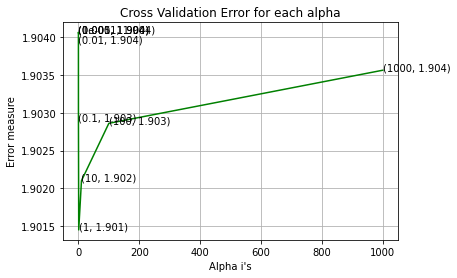

log loss for train data 1.8674257324944725
log loss for cv data 1.9014525994285685
log loss for test data 1.9053269110490234


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
pred_y=sig_clf.predict(X_test_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',log_loss(y_train_merge, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',log_loss(y_cv_merge, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',log_loss(y_test_merge, predict_y, labels=logisticR.classes_, eps=1e-15))

Number of misclassified points  72.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


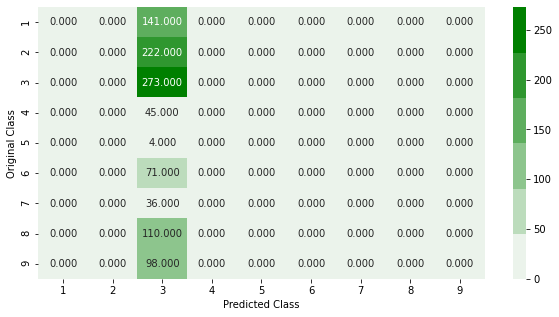

-------------------------------------------------- Precision matrix --------------------------------------------------


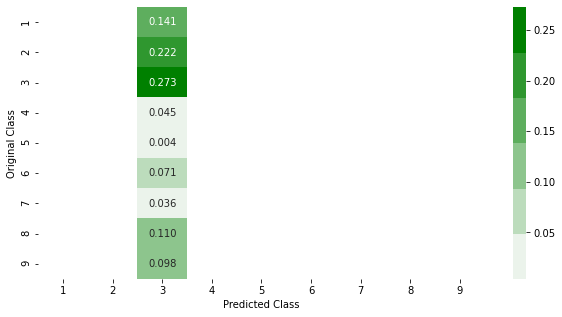

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


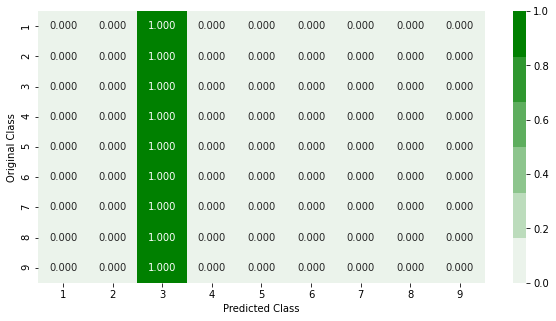

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

Conclusion: Using more number of bigram features does not help. Only noticeable improvement seen in train log loss. Precision and Recall matrices numbers are same as those of the one with 2000 features

## 5.2 Calculate image feature on asm files

In [ ]:
from multiprocessing import Pool
import os
from csv import writer
import numpy as np
import math
import scipy.misc
import array
import time as tm
from tqdm import tqdm

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
!pip install kaggle
from google.colab import files
from datetime import datetime
api_token = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -rf sample_data/

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c 'malware-classification'

100% 4.06M/4.06M [00:00<00:00, 13.9MB/s]

  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 95.1MB/s]
100% 17.5G/17.5G [05:29<00:00, 35.9MB/s]
100% 17.5G/17.5G [05:29<00:00, 57.0MB/s]
100% 17.8G/17.8G [05:45<00:00, 43.9MB/s]
100% 17.8G/17.8G [05:45<00:00, 55.2MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 94.4MB/s]


In [ ]:
# Keep only train.7z, trainLabels files remove other files as shown below
!rm test.7z
!rm sampleSubmission.csv.zip
!rm dataSample.7z

In [ ]:
# 
data=!7z l train.7z
print(len(data))
print(type(data))

21759
<class 'IPython.utils.text.SList'>


In [ ]:
byte_file_list=[]
asm_file_list=[]
for i in data:
  if (i.endswith("bytes")):
    byte_file_list.append(i)
  elif (i.endswith("asm")):
    asm_file_list.append(i)

In [ ]:
print('Number of ASM files',len(asm_file_list))

Number of ASM files 10868


In [ ]:
# Finding only the file names of ASM files and storing the file names in an array
asm_file_name=[]
for i in range(0,len(asm_file_list)):
  asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
asm_file_name[:3]

['01azqd4InC7m9JpocGv5.asm',
 '01IsoiSMh5gxyDYTl4CB.asm',
 '01jsnpXSAlgw6aPeDxrU.asm']

In [ ]:
#https://www.thepythoncode.com/article/get-directory-size-in-bytes-using-python

def get_directory_size(directory):
    """Returns the `directory` size in bytes."""
    total = 0
    try:
        # print("[+] Getting the size of", directory)
        for entry in os.scandir(directory):
            if entry.is_file():
                # if it's a file, use stat() function
                total += entry.stat().st_size
            elif entry.is_dir():
                # if it's a directory, recursively call this function
                total += get_directory_size(entry.path)
    except NotADirectoryError:
        # if `directory` isn't a directory, get the file size then
        return os.path.getsize(directory)
    except PermissionError:
        # if for whatever reason we can't open the folder, return 0
        return 0
    return total

In [ ]:
def get_size_format(b, factor=1024, suffix="B"):
    """
    Scale bytes to its proper byte format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

In [ ]:
from google.colab import files
trimmed_labels = files.upload()

Saving trimmed_labels.csv to trimmed_labels.csv


In [ ]:
trimmed_labels_df = pd.read_csv('trimmed_labels.csv').drop("Unnamed: 0",axis=1)
trimmed_labels_df.head(2)

Id  Class            complete_file_id
0  01kcPWA9K2BOxQeS5Rju      1  01kcPWA9K2BOxQeS5Rju.bytes
1  05EeG39MTRrI6VY21DPd      1  05EeG39MTRrI6VY21DPd.bytes

In [ ]:
#Creating a new column asm_file_id by adding .asm to the filename column
trimmed_labels_df['asm_file_id'] = trimmed_labels_df['Id'].astype(str) + '.asm'
trimmed_labels_df

Id  ...               asm_file_id
0     01kcPWA9K2BOxQeS5Rju  ...  01kcPWA9K2BOxQeS5Rju.asm
1     05EeG39MTRrI6VY21DPd  ...  05EeG39MTRrI6VY21DPd.asm
2     0AwWs42SUQ19mI7eDcTC  ...  0AwWs42SUQ19mI7eDcTC.asm
3     0DqUX5rkg3IbMY6BLGCE  ...  0DqUX5rkg3IbMY6BLGCE.asm
4     0eaNKwluUmkYdIvZ923c  ...  0eaNKwluUmkYdIvZ923c.asm
...                    ...  ...                       ...
4995  K7HTMuk6fo2wrhyWxY43  ...  K7HTMuk6fo2wrhyWxY43.asm
4996  k8qrhNTAG54fSl6jDtVa  ...  k8qrhNTAG54fSl6jDtVa.asm
4997  kAtomObScfxVW1DKXUla  ...  kAtomObScfxVW1DKXUla.asm
4998  kchO8uQA9Me4H3jZTSgm  ...  kchO8uQA9Me4H3jZTSgm.asm
4999  KF7NGoQSk8v9OE0nrwy2  ...  KF7NGoQSk8v9OE0nrwy2.asm

[5000 rows x 4 columns]

### 5.2.1 Selecting only 5000 asm files

I am using only 5000 asm files due to limitations in compute resources on Google Colab

In [ ]:
list1 = asm_file_name
list2 = list(trimmed_labels_df['asm_file_id'])
print(len(list1))
print(len(list2))

10868
5000


In [ ]:
#https://stackoverflow.com/a/34288440
set2 = set(list2)
final_list = [x for x in list1 if x in set2]
len(final_list)

5000

### 5.2.2 Splitting the 5000 asm files into five batches

This is done that extraction from `train.7z` file is easier to perform for the system.

In [ ]:
asmbatch1 = final_list[:1000]
len(asmbatch1)

1000

In [ ]:
asmbatch2 = final_list[1000:2000]
len(asmbatch2)

1000

In [ ]:
asmbatch3 = final_list[2000:3000]
len(asmbatch3)

1000

In [ ]:
asmbatch4 = final_list[3000:4000]
len(asmbatch4)

1000

In [ ]:
asmbatch5 = final_list[4000:5000]
len(asmbatch5)

1000

#### 5.2.2.1 Processing Batch 1 of asm files

In [ ]:
count = 0
for file in tqdm(asmbatch1):
  !7z e train.7z -o/content/asmbatch1 *$file -r
  count+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Query asked and solved by team@appliedaicourse.com
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch1")
files = []
asm_matrix = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files.append(filename)
  file = open('asmbatch1/'+asmfile,'rb') #decodes asm to bytes
  arr = array.array('B') # an empty unsigned char array
  arr.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix
  asm_matrix[i:] = arr[:800]

1000it [03:54,  4.27it/s]


In [ ]:
print(files)

['4bP0fpWK9ygln6RwLCmY', '0BKcmNv4iGY2hsVSaXJ6', '5CiGOStRIX3ayFUrAeoQ', '60gR3qnjoYPf4rpbCOSk', '2LfPBwRadN3TulW86pvO', '4BdQMg5PDlWq69ZXwReb', '21OaoipR7tqxzF4HQ9f0', '2ZY5e4PHsEAvkziQGFR6', '0Phtp2LVcsCFMKkGgmRH', '52GeORAFh08SW7lYocXU', '0otC2dSxuGDzY6XHLkq3', '623eFhxtASpOuCcQviwr', '49A8ITdtp3EoJwHPfhsj', '3m8kb5ILPrHcMC1o9Nht', '43Pz67mIVtohuyapcLKj', '3EvAIU8zX2g96DJj5Grp', '5i3dyOv9GDKJuCVHF0q1', '4txzUmCskIHWrpBgLZM0', '2Eq3HXCP9O6JulmS0zY5', '08BX5Slp2I1FraZWbc6j', '1fJqS7HUCEa6PYx0ZLc9', '0ZiAjFN81BOE7plhCnSm', '1cX2xrbYwzdaM4mWuoCl', '4kKcuD5YGjy8QtUh6Vm1', '0tZy7jgOKCIJslPRvrop', '3kqaIlVuPtxQJejvyNZ0', '0meUjiuJvODcf3k9z4Iy', '0NyfGXt8nmlK72Q9Irhs', '2gUPy7nNQD4Fjkv69ose', '4eC9LmdHc6pRoP8BtTGv', '4sPNK2e8VEkXb5t1odf9', '57v6nKMC8lhLV34je2RW', '0wmZBjQenOTsu5bpSkf6', '2WBAlcgeu4zZbTNy713v', '1EDNRfXhHWl7txAOdycU', '5z4RdEK3fJleayugmjqH', '5tLizVMafFr6UpmbZ8ed', '4EnNLux3rOG8i0W9DBVf', '5su2fIARtLqUzSdQgDB9', '29FZvBJyX0GbnaLAYeKw', '5NMOKeAjmuGHlDnb40QL', '0yjkG4BHeCbTim

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data = np.concatenate((np.array(files)[:, None], asm_matrix), axis = 1)
asm_matrix_data

array([['4bP0fpWK9ygln6RwLCmY', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['0BKcmNv4iGY2hsVSaXJ6', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['5CiGOStRIX3ayFUrAeoQ', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ...,
       ['52wpQad87Estg1jBLmeW', '46.0', '116.0', ..., '101.0', '115.0',
        '115.0'],
       ['5mBNaMtbUno9cTkgieRu', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['41sxuO3ZpR5vAc0Kbjqe', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0']], dtype='<U32')

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch1 = pd.DataFrame(asm_matrix_data, columns = column_names)
asm_image_df_batch1

filename ASM_1  ASM_2  ASM_3  ... ASM_797 ASM_798 ASM_799 ASM_800
0    4bP0fpWK9ygln6RwLCmY  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
1    0BKcmNv4iGY2hsVSaXJ6  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
2    5CiGOStRIX3ayFUrAeoQ  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
3    60gR3qnjoYPf4rpbCOSk  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
4    2LfPBwRadN3TulW86pvO  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
..                    ...   ...    ...    ...  ...     ...     ...     ...     ...
995  3elSqr7UTEtFm04ZybvI  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
996  2icwOdb5xCshnIvMXfy4  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
997  52wpQad87Estg1jBLmeW  46.0  116.0  101.0  ...   114.0   101.0   115.0   115.0
998  5mBNaMtbUno9cTkgieRu  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
999  41sxuO3ZpR5vAc0Kbjqe  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0

[1000 rows x 801 columns]

In [ ]:
asm_image_df_batch1.to_csv('asm_image_df_batch1.csv')

In [ ]:
!cp asm_image_df_batch1.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 731938
-rw------- 1 root root   4051244 Apr 17 10:15 asm_image_df_batch1.csv
-rw------- 1 root root   2070986 Apr 17 10:15 MMD_final_file.ipynb
-rw------- 1 root root    351150 Apr 16 09:30 Untitled0.ipynb
-rw------- 1 root root    422522 Apr  9 06:59 asm_filesMMD.ipynb
-rw------- 1 root root 512580904 Mar 30 09:10 bigram_features1479.npz
-rw------- 1 root root  44630823 Mar 30 09:10 bigrams_df2.csv
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2  2020 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
!rm -rf asmbatch1/

#### 5.2.2.2 Processing Batch 2 of asm files

In [ ]:
count = 0
for file in tqdm(asmbatch2):
  !7z e train.7z -o/content/asmbatch2 *$file -r
  count+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch2")
files2 = []
asm_matrix2 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files2.append(filename)
  file = open('asmbatch2/'+asmfile,'rb') #decodes asm to bytes
  arr2 = array.array('B') # an empty unsigned char array
  arr2.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix2
  asm_matrix2[i:] = arr2[:800]

1000it [04:03,  4.10it/s]


In [ ]:
print(files2)

['6QtaMBu0P4kEjTgcxYAn', '8T6pnojxKFcYQR59tEuL', '9FqQV5edjvIzGXMo32hi', 'B9Er5flSnY8GPoFJb7vz', '7ri8e1uFxo9B3hD4p2Jk', 'B6ekpnjGHXYEybfSOzP5', '6gGY74i3DHlfjoC0xvWI', '8Bywd5tJUzgqbGmvcIS4', 'aJtXlTdUzZGoEwB3i5Pm', 'B4wMxFdt30yYp2ourNRI', 'BbYwz50Rv8TM1CrPDnkI', '9wEhXkNovYrGb6BD814j', '9463P7bjDcRnOYxeXAzN', 'a84R1sFmP2NvicpgkJIo', 'AYzHFQMeWf25Ov0tqJSn', '8zMCrYOyB17UZ2jxWJQG', '8fgzBbsoHXwJ6UvDhmL4', '7BFRaJIPKrv3QVbkDx9C', '6Nvl48hYgxsc0U5Aw3yF', '9dYh3wO2WUFAH5f8VyKQ', '9HJsvSmGZRWbUygFt2eP', '9DiHIregYkyCL3lzNvtJ', '91GncYPQHMUTaSuZBqxJ', 'Au5EYTxqCHhdtjBXJfsp', 'a9qc1ZCzupOiSsjHdx8e', '9NPX21MLDFoAHh3ZwuGm', '85qyLrVc1vhsKCfnNXmx', '6mGvPyTaWit3wcogY9jO', '9Rwu8Es7InNiLjDkQSXd', 'anChwpjZ5qmgWJkcyxiN', 'a9W2SxJ5nbXTsMpGmjLK', 'ABDGLcYxIh1efOnq98vg', '8dlCjM1YApWuSsQhLoqG', '6qs0AxVC4GY2DJZyT9mN', 'bAZhqgSnCfNdXPDptGyi', 'b0HK7PdNL8Z5omGsTe3u', 'AcgCHa4oQx3q8XvijZrL', 'a5nMiy8gBFtpuGTxIv0W', '8hkxUfgW2bHMqPjrcNLT', '81ZbxYRAu0SEJOj5NsgC', 'aloVCMO1bnqKtyuceNd9', 'AtjeimUnQDzEqb

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data2 = np.concatenate((np.array(files2)[:, None], asm_matrix2), axis = 1)
asm_matrix_data2

array([['6QtaMBu0P4kEjTgcxYAn', '46.0', '116.0', ..., '13.0', '10.0',
        '46.0'],
       ['8T6pnojxKFcYQR59tEuL', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['9FqQV5edjvIzGXMo32hi', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ...,
       ['7z03lVS5IJ8wOCvQyFdZ', '46.0', '116.0', ..., '13.0', '10.0',
        '46.0'],
       ['9YAyRfMXO8kJKgEoSd6m', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['aShC7zEjIfLm20oM4swq', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0']], dtype='<U32')

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch2 = pd.DataFrame(asm_matrix_data2, columns = column_names)
asm_image_df_batch2

filename ASM_1  ASM_2  ASM_3  ... ASM_797 ASM_798 ASM_799 ASM_800
0    6QtaMBu0P4kEjTgcxYAn  46.0  116.0  101.0  ...    41.0    13.0    10.0    46.0
1    8T6pnojxKFcYQR59tEuL  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
2    9FqQV5edjvIzGXMo32hi  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
3    B9Er5flSnY8GPoFJb7vz  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
4    7ri8e1uFxo9B3hD4p2Jk  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
..                    ...   ...    ...    ...  ...     ...     ...     ...     ...
995  7PtsSV1FrYgEfGpaqOn8  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
996  9bx5RUkH6CZzoS7OXmIY  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
997  7z03lVS5IJ8wOCvQyFdZ  46.0  116.0  101.0  ...    41.0    13.0    10.0    46.0
998  9YAyRfMXO8kJKgEoSd6m  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
999  aShC7zEjIfLm20oM4swq  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0

[1000 rows x 801 columns]

In [ ]:
asm_image_df_batch2.to_csv('asm_image_df_batch2.csv')

In [ ]:
!cp asm_image_df_batch2.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 735901
-rw------- 1 root root   4052692 Apr 17 14:09 asm_image_df_batch2.csv
-rw------- 1 root root   2075802 Apr 17 14:08 MMD_final_file.ipynb
-rw------- 1 root root   4051244 Apr 17 10:15 asm_image_df_batch1.csv
-rw------- 1 root root    351150 Apr 16 09:30 Untitled0.ipynb
-rw------- 1 root root    422522 Apr  9 06:59 asm_filesMMD.ipynb
-rw------- 1 root root 512580904 Mar 30 09:10 bigram_features1479.npz
-rw------- 1 root root  44630823 Mar 30 09:10 bigrams_df2.csv
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2  2020 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
!rm -rf asmbatch2/

#### 5.2.2.3 Processing Batch 3 of asm files

In [ ]:
count = 0
for file in tqdm(asmbatch3):
  !7z e train.7z -o/content/asmbatch3 *$file -r
  count+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch3")
files3 = []
asm_matrix3 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files3.append(filename)
  file = open('asmbatch3/'+asmfile,'rb') #decodes asm to bytes
  arr3 = array.array('B') # an empty unsigned char array
  arr3.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix3
  asm_matrix3[i:] = arr3[:800]

1000it [04:08,  4.03it/s]


In [ ]:
print(files3)

['bKumYLRfEStU2Iydacxz', 'cSEND4vF3fLOqUgylCZ2', 'DMjq5z4vmgwOaE1Q2XoG', 'dlSVoJMCzwnZxrt0ybUm', 'BynGZjrhQXJiKkNt3Y2W', 'CKL9vk4x2IJZoM5sbu1R', 'BFmbPXnMtl9oVyI1SYvT', 'eHjL4QC8MPTkhdqtZaDV', 'CywHbj2cUaVYgp9xhIDk', 'bwcMeNJ6duOxi2q0GQ4n', 'clCOkQxvBKzwWaPZ5RSH', 'CMKpr6JYU4Rw50XBDHVO', 'DZQHOmU7IVc3KWMbzJCE', 'EilXmdUb6zGBJWk9T2SO', 'cij8sn69KXL7moUrg2Zv', 'DiT8evBOkIyGsdxqjAhC', 'DCbTkH41EJzSQtLAVFmp', 'D6WLAbdEhBvgXrRMJkao', 'dAe1HUpVzKomkr6vCLGb', 'DrfPgtBxylwzc9AX1mji', 'eFK1IWckUmuM3oCAjON0', 'd0jkP2OD83C4AmzKtE9g', 'cDPRYKhCwnNB7t5WIFb8', 'EC2yvmbNV8rSzRu4qZA1', 'DyHEmqIAUN7LVO2a5zZc', 'cVYX2gTrFnB3HfP8m5U9', 'cNqPy69uQHgF3DOU14G7', 'bwRF4icVxTHzGnUKvu2s', 'ehW19YdIEik3jUpGA8sX', 'dV8TQtBk3AK6nFq4zihw', 'd7XHlwrYtyQk8CNIa0AU', 'dSCoRmelbUOs3t9Bp8g5', 'BXQNYRIMHrq8LZ7Ay9pc', 'ecd3A46BQyk2SFJ7IMqb', 'cBTaW6V7hrS5fKgJvwjA', 'DIhavCQHTBOkisxU9NJG', 'D5rOGmu3ePpWqYX7bn6j', 'dOc4AD20ltIzKYHCPNFS', 'CpeIDYlmhsART4Oc7gqz', 'eCFQTgkih9lsKtoqIAj1', 'DnmZzjur8OdgbvAJ9RxF', 'Db6hOB1PFyELXm

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data3 = np.concatenate((np.array(files3)[:, None], asm_matrix3), axis = 1)
asm_matrix_data3

array([['bKumYLRfEStU2Iydacxz', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['cSEND4vF3fLOqUgylCZ2', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['DMjq5z4vmgwOaE1Q2XoG', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ...,
       ['dJ1CDAPGMBEtq6RNLYjU', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['e10PUY97MwByIDjA8LEF', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['EBXA6Kxc8IP5pZ7RFlkV', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0']], dtype='<U32')

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch3 = pd.DataFrame(asm_matrix_data3, columns = column_names)
asm_image_df_batch3

filename ASM_1  ASM_2  ASM_3  ... ASM_797 ASM_798 ASM_799 ASM_800
0    bKumYLRfEStU2Iydacxz  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
1    cSEND4vF3fLOqUgylCZ2  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
2    DMjq5z4vmgwOaE1Q2XoG  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
3    dlSVoJMCzwnZxrt0ybUm  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
4    BynGZjrhQXJiKkNt3Y2W  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
..                    ...   ...    ...    ...  ...     ...     ...     ...     ...
995  Eeni9vHLuSa6lJOBVtyA  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
996  btaERgnQGZMzrDWvkSoU  46.0  116.0  101.0  ...   114.0   101.0   115.0   115.0
997  dJ1CDAPGMBEtq6RNLYjU  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
998  e10PUY97MwByIDjA8LEF  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
999  EBXA6Kxc8IP5pZ7RFlkV  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0

[1000 rows x 801 columns]

In [ ]:
asm_image_df_batch3.to_csv('asm_image_df_batch3.csv')

In [ ]:
!cp asm_image_df_batch3.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

#### 5.2.2.4 Processing Batch 4 of asm files

In [ ]:
count = 0
for file in tqdm(asmbatch4):
  !7z e train.7z -o/content/asmbatch4 *$file -r
  count+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch4")
files4 = []
asm_matrix4 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files4.append(filename)
  file = open('asmbatch4/'+asmfile,'rb') #decodes asm to bytes
  arr4 = array.array('B') # an empty unsigned char array
  arr4.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix3
  asm_matrix4[i:] = arr4[:800]

1000it [03:51,  4.32it/s]


In [ ]:
print(files4)

['gkKeaVzi3TyCbL7fEWSB', 'GK3DuZAoU1YkPTWnzC7V', 'gZRseTmhYfHPvEnVFDiq', 'FoS2Z5sNPOI1vQGWaRMe', 'f2104Ztv6hQPDnaYz9B7', 'FYPXNW2S6eO9zMVR3HaK', 'FP7u6VsNE8m1GCjBiXfS', 'hGrRVejLFzNtXcBW6s2p', 'fwz93tVUqB0KSh57QMkl', 'GxlJVp3SyrY5vKOd9QgR', 'HJ3G8CS9f4yVmadQ0tOP', 'F4Yfxzi6htG1ReS0M7Z8', 'hdJnQNkT6b4yDeVwaR3F', 'Gh4gVXZBCHSkjTDLsMlt', 'FCQV3jK6B12LrReZdmDu', 'HaOw84bYfkn2yxpiRFPM', 'GltvVHPJ9eLNj48a5CBR', 'Frgfw47IkyO3ZBXlsQWc', 'HaTioeY3kbvJW2LXtOwF', 'eXu9bAoQ5UWBfCz3KsJN', 'F6BIw9uWHcxymC7tJsDM', 'EsQSLYTmVKNxr56Z41R7', 'ET1JOARX9PKk0bcwp3jN', 'Gycu1WC5mE6BzMl2ArD7', 'fQs8jHrye30NE6KMP9RO', 'fdKU92Heigr1xALlFTkS', 'gq1T5uf3MyIdtU0HsN9a', 'hIDK0p1PAiJdL87CzG69', 'FfxBsCDyAul0HSgtGdM1', 'GLXFv4PfqV6dD9eaIO3h', 'GOEKlWF9DoZ7Y13rJ8ia', 'gLO6W1y9Pu7ZJhCFfvxK', 'GcDqJZKaY7OdRAkm4o95', 'fhPezOdViLjBl7pyaFNw', 'gq0Y8ZH1eU2NuIo5tOA6', 'gA2keFy5GKsjdpBriL7M', 'fMKS7QUA0HsYJ56DWxrZ', 'hJAuWl3aGKLbRz0gtiSe', 'EV5qiMnPCxDZIRgmwk0b', 'GSBVYnK0U8HMDLyfeEjF', 'EKzas0qTBM4n8OxgHYX2', 'EK40kDNbX1H7AL

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data4 = np.concatenate((np.array(files4)[:, None], asm_matrix4), axis = 1)
asm_matrix_data4

array([['gkKeaVzi3TyCbL7fEWSB', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['GK3DuZAoU1YkPTWnzC7V', '46.0', '116.0', ..., '13.0', '10.0',
        '46.0'],
       ['gZRseTmhYfHPvEnVFDiq', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ...,
       ['H8dnb7uFRMm01jqDYWC3', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['gcSAbDRBOnPvN8jxGouq', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['euLCGs3vYh5nwgZQt2H4', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0']], dtype='<U32')

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch4 = pd.DataFrame(asm_matrix_data4, columns = column_names)
asm_image_df_batch4

filename ASM_1  ASM_2  ASM_3  ... ASM_797 ASM_798 ASM_799 ASM_800
0    gkKeaVzi3TyCbL7fEWSB  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
1    GK3DuZAoU1YkPTWnzC7V  46.0  116.0  101.0  ...    41.0    13.0    10.0    46.0
2    gZRseTmhYfHPvEnVFDiq  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
3    FoS2Z5sNPOI1vQGWaRMe  46.0  122.0  101.0  ...   114.0   101.0   115.0   115.0
4    f2104Ztv6hQPDnaYz9B7  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
..                    ...   ...    ...    ...  ...     ...     ...     ...     ...
995  gBX47iCvYrZVDqpHeAab  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
996  gp7MxT3EYbicRlBKty90  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
997  H8dnb7uFRMm01jqDYWC3  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
998  gcSAbDRBOnPvN8jxGouq  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
999  euLCGs3vYh5nwgZQt2H4  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0

[1000 rows x 801 columns]

In [ ]:
asm_image_df_batch4.to_csv('asm_image_df_batch4.csv')

In [ ]:
!cp asm_image_df_batch4.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 743972
-rw------- 1 root root   4051677 Apr 19 09:21 asm_image_df_batch4.csv
-rw------- 1 root root   2236455 Apr 19 09:20 MMD_final_file.ipynb
-rw------- 1 root root   4051089 Apr 18 10:19 asm_image_df_batch3.csv
-rw------- 1 root root   4052692 Apr 17 14:09 asm_image_df_batch2.csv
-rw------- 1 root root   4051244 Apr 17 10:15 asm_image_df_batch1.csv
-rw------- 1 root root    351150 Apr 16 09:30 Untitled0.ipynb
-rw------- 1 root root    422522 Apr  9 06:59 asm_filesMMD.ipynb
-rw------- 1 root root 512580904 Mar 30 09:10 bigram_features1479.npz
-rw------- 1 root root  44630823 Mar 30 09:10 bigrams_df2.csv
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2  2020 9_DonorsChoose_RF_GBDT.ipynb


In [ ]:
!rm -rf asmbatch4/

#### 5.2.2.5 Processing Batch 5 of asm files

In [ ]:
count = 0
for file in tqdm(asmbatch5):
  !7z e train.7z -o/content/asmbatch5 *$file -r
  count+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch5")
files5 = []
asm_matrix5 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files5.append(filename)
  file = open('asmbatch5/'+asmfile,'rb') #decodes asm to bytes
  arr5 = array.array('B') # an empty unsigned char array
  arr5.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix5
  asm_matrix5[i:] = arr5[:800]

1000it [04:08,  4.02it/s]


In [ ]:
print(files5)

['I2W3i5wHhq9UpyFVRgzE', 'j013oneKzBOVyiMHGa6q', 'hy31LBzZrOj98Qm7tE4c', 'icj1JwTvFPKeUAkE3SGN', 'JSxm4ulB0DOcHZKvkgT8', 'JUCpOmLGibKr7gdPHfhj', 'JeuzM8SRYWGK1navfErh', 'JIy6ZgaGtHBAmv2krdKx', 'KdPahj5FQB4RCbNEzsnS', 'HP9XAZik5fCJbjupGyV4', 'JOaTGd7Pb2ekRXMHu06S', 'iPrHAsaDfj9wM04dxCR7', 'jhzl5tWPcD0gSFiKTwQ6', 'JZ0awYrmX2UWLD6zpV1l', 'JEdVbXyCro7SBKHZRPOe', 'I9lORUzi68vFf2510QjP', 'idDSEvTsVqZhI7MlKnGu', 'IQzSymvVCNgMr2qWZUh8', 'J2NeYuA4IBz3f5KPVo9Q', 'jn4ALqJUE9u8TPRyd6t5', 'HuD3AtnJlpCVLdkIWsZS', 'I3zcG1EdgynLPstV7bHQ', 'kCyuYhjLRZU7XF52NVzo', 'iqS2Jm1Iv3GCEUpof5ua', 'JqmfZtMAhIdjSs6pUulT', 'jEYIT73vQGWhCm8qNFB2', 'kcCrogv0Dhe6A52B8URa', 'Kd1CHyERprf9NTQMlsWL', 'IWUFk2w6THtdVq9yzn4s', 'iHZnpXNuLTUQtElFz3jr', 'jyCUclPuFnL2Y8Z5meRg', 'kghNvYueUqRoQsbSZ89M', 'hmdGiNLnFsEK3kD56aBc', 'jLtKBPl5Xk6peO9DWucy', 'jlSnNDwm6Arby4cQv0ox', 'JnOV89xWwmhI4HR0XL7o', 'JRkmlOCtMWc9j1o6E20h', 'jh5EgYDdqxsan190RW8U', 'LOP6HaJKXpkic5dyuVnT', 'l1OdNtIKM8Gi6jowZHg3', 'IftFXWmh7B5Alnxy4DbJ', 'HnZ5MNaCpu0k7d

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data5 = np.concatenate((np.array(files5)[:, None], asm_matrix5), axis = 1)
asm_matrix_data5

array([['I2W3i5wHhq9UpyFVRgzE', '72.0', '69.0', ..., '108.0', '97.0',
        '116.0'],
       ['j013oneKzBOVyiMHGa6q', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['hy31LBzZrOj98Qm7tE4c', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ...,
       ['iBT1K8E62rpmG73jN9VS', '72.0', '69.0', ..., '61.0', '61.0',
        '61.0'],
       ['K1TBRacdPrvqOXCjDw2J', '72.0', '69.0', ..., '58.0', '49.0',
        '48.0'],
       ['Izbos3ZTyWKju6k514NY', '46.0', '122.0', ..., '101.0', '115.0',
        '115.0']], dtype='<U32')

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch5 = pd.DataFrame(asm_matrix_data5, columns = column_names)
asm_image_df_batch5

filename ASM_1  ASM_2  ASM_3  ... ASM_797 ASM_798 ASM_799 ASM_800
0    I2W3i5wHhq9UpyFVRgzE  72.0   69.0   65.0  ...   102.0   108.0    97.0   116.0
1    j013oneKzBOVyiMHGa6q  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
2    hy31LBzZrOj98Qm7tE4c  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
3    icj1JwTvFPKeUAkE3SGN  46.0  116.0  101.0  ...    41.0    13.0    10.0    46.0
4    JSxm4ulB0DOcHZKvkgT8  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
..                    ...   ...    ...    ...  ...     ...     ...     ...     ...
995  JZyx7pL2ueEr1Nwlj8aD  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
996  iDx4TemwdyfNER52l0Mn  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
997  iBT1K8E62rpmG73jN9VS  72.0   69.0   65.0  ...    61.0    61.0    61.0    61.0
998  K1TBRacdPrvqOXCjDw2J  72.0   69.0   65.0  ...    82.0    58.0    49.0    48.0
999  Izbos3ZTyWKju6k514NY  46.0  122.0  101.0  ...   114.0   101.0   115.0   115.0

[1000 rows x 801 columns]

In [ ]:
asm_image_df_batch5.to_csv('asm_image_df_batch5.csv')

In [ ]:
!cp asm_image_df_batch5.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 747960
-rw------- 1 root root   4054647 Apr 20 08:45 asm_image_df_batch5.csv
-rw------- 1 root root   2265559 Apr 20 08:44 MMD_final_file.ipynb
-rw------- 1 root root   4051677 Apr 19 09:21 asm_image_df_batch4.csv
-rw------- 1 root root   4051089 Apr 18 10:19 asm_image_df_batch3.csv
-rw------- 1 root root   4052692 Apr 17 14:09 asm_image_df_batch2.csv
-rw------- 1 root root   4051244 Apr 17 10:15 asm_image_df_batch1.csv
-rw------- 1 root root    351150 Apr 16 09:30 Untitled0.ipynb
-rw------- 1 root root    422522 Apr  9 06:59 asm_filesMMD.ipynb
-rw------- 1 root root 512580904 Mar 30 09:10 bigram_features1479.npz
-rw------- 1 root root  44630823 Mar 30 09:10 bigrams_df2.csv
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ipynb
-rw------- 1 root root    559255 Oct  2  2020 9_DonorsChoos

### 5.2.3 Combining the 5 batches of asm files

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df_batch1.csv').drop("Unnamed: 0",axis=1)
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df_batch2.csv').drop("Unnamed: 0",axis=1)
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df_batch3.csv').drop("Unnamed: 0",axis=1)
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df_batch4.csv').drop("Unnamed: 0",axis=1)
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df_batch5.csv').drop("Unnamed: 0",axis=1)

In [ ]:
#https://www.statology.org/stack-pandas-dataframes/
asm_image_df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
asm_image_df

filename  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0     4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...     61.0     61.0     61.0
1     0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...     61.0     61.0     61.0
2     5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...     61.0     61.0     61.0
3     60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...    108.0     97.0    116.0
4     2LfPBwRadN3TulW86pvO   72.0   69.0  ...     61.0     61.0     61.0
...                    ...    ...    ...  ...      ...      ...      ...
4995  JZyx7pL2ueEr1Nwlj8aD   72.0   69.0  ...     61.0     61.0     61.0
4996  iDx4TemwdyfNER52l0Mn   72.0   69.0  ...     61.0     61.0     61.0
4997  iBT1K8E62rpmG73jN9VS   72.0   69.0  ...     61.0     61.0     61.0
4998  K1TBRacdPrvqOXCjDw2J   72.0   69.0  ...     58.0     49.0     48.0
4999  Izbos3ZTyWKju6k514NY   46.0  122.0  ...    101.0    115.0    115.0

[5000 rows x 801 columns]

Checking to see whether any files have been processed twice. This is done by checking if the column `filename` has any duplicate values

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
checklist = asm_image_df['filename'].duplicated(keep=False)==True
checklist

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: filename, Length: 5000, dtype: bool

In [ ]:
count = 0
for i in list(checklist):
  if i==True:
    count+=1
  else:
    print("No duplicate values")

Streaming output truncated to the last 5000 lines.
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplicate values
No duplic

In [ ]:
count

0

In [ ]:
asm_image_df.to_csv('asm_image_df.csv')

In [ ]:
!cp asm_image_df.csv '/content/drive/MyDrive/Colab Notebooks'
!ls -lt '/content/drive/MyDrive/Colab Notebooks' 

total 767903
-rw------- 1 root root  20240581 Apr 21 07:57 asm_image_df.csv
-rw------- 1 root root   2446198 Apr 21 07:56 MMD_final_file.ipynb
-rw------- 1 root root   4054647 Apr 20 08:45 asm_image_df_batch5.csv
-rw------- 1 root root   4051677 Apr 19 09:21 asm_image_df_batch4.csv
-rw------- 1 root root   4051089 Apr 18 10:19 asm_image_df_batch3.csv
-rw------- 1 root root   4052692 Apr 17 14:09 asm_image_df_batch2.csv
-rw------- 1 root root   4051244 Apr 17 10:15 asm_image_df_batch1.csv
-rw------- 1 root root    351150 Apr 16 09:30 Untitled0.ipynb
-rw------- 1 root root    422522 Apr  9 06:59 asm_filesMMD.ipynb
-rw------- 1 root root 512580904 Mar 30 09:10 bigram_features1479.npz
-rw------- 1 root root  44630823 Mar 30 09:10 bigrams_df2.csv
-rw------- 1 root root 183822436 Mar 29 05:59 bigrams_df.csv
-rw------- 1 root root       306 Mar 22 05:34 Untitled
-rw------- 1 root root   1012000 Mar 12 09:56 MalwareDetectiontestfile.ipynb
-rw------- 1 root root       314 Feb  9 14:17 9thJan.ip

In [ ]:
asm_image_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asm_image_df.csv').drop("Unnamed: 0",axis=1)
asm_image_df

filename  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0     4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...     61.0     61.0     61.0
1     0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...     61.0     61.0     61.0
2     5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...     61.0     61.0     61.0
3     60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...    108.0     97.0    116.0
4     2LfPBwRadN3TulW86pvO   72.0   69.0  ...     61.0     61.0     61.0
...                    ...    ...    ...  ...      ...      ...      ...
4995  JZyx7pL2ueEr1Nwlj8aD   72.0   69.0  ...     61.0     61.0     61.0
4996  iDx4TemwdyfNER52l0Mn   72.0   69.0  ...     61.0     61.0     61.0
4997  iBT1K8E62rpmG73jN9VS   72.0   69.0  ...     61.0     61.0     61.0
4998  K1TBRacdPrvqOXCjDw2J   72.0   69.0  ...     58.0     49.0     48.0
4999  Izbos3ZTyWKju6k514NY   46.0  122.0  ...    101.0    115.0    115.0

[5000 rows x 801 columns]

In [ ]:
asm_image_df = asm_image_df.rename(columns={"filename":"ID"})
asm_image_df.head(1)

ID  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0  4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...     61.0     61.0     61.0

[1 rows x 801 columns]

In [ ]:
result_with_size = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/result_with_size.csv').drop("Unnamed: 0",axis=1)
result_with_size.head()

ID       0     1     2  ...     ff     ??      size  Class
0  01azqd4InC7m9JpocGv5  601905  3905  2816  ...   5753   1824  4.234863      9
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  ...  54902   8588  5.538818      2
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  ...  49144    468  3.887939      9
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726  ...   7998  13940  0.574219      1
4  01SuzwMJEIXsK7A8dQbl   19764   710   302  ...   2199   9008  0.370850      8

[5 rows x 260 columns]

In [ ]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result_with_size)

## 5.3 Combining asm image features and bytes unigram features

In [ ]:
result_x = pd.merge(asm_image_df,result, on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','Class'], axis=1)
result_x

ASM_1  ASM_2  ASM_3  ASM_4  ...        fe        ff        ??      size
0      72.0   69.0   65.0   68.0  ...  0.031030  0.013392  0.107215  0.201100
1      72.0   69.0   65.0   68.0  ...  0.033147  0.013204  0.107432  0.201100
2      72.0   69.0   65.0   68.0  ...  0.016350  0.009188  0.105697  0.150520
3      72.0   69.0   65.0   68.0  ...  0.002122  0.003183  0.001963  0.009960
4      72.0   69.0   65.0   68.0  ...  0.001222  0.003002  0.000636  0.006233
...     ...    ...    ...    ...  ...       ...       ...       ...       ...
4995   72.0   69.0   65.0   68.0  ...  0.016969  0.009778  0.105083  0.150254
4996   72.0   69.0   65.0   68.0  ...  0.070334  0.057748  0.000030  0.084499
4997   72.0   69.0   65.0   68.0  ...  0.004207  0.003263  0.000659  0.009960
4998   72.0   69.0   65.0   68.0  ...  0.010837  0.032140  0.000072  0.050424
4999   46.0  122.0  101.0  110.0  ...  0.036849  0.088473  0.000859  0.117243

[5000 rows x 1058 columns]

### 5.3.1 Train Test Split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 1058) (3200,)
(800, 1058) (800,)
(1000, 1058) (1000,)


### 5.3.2 Random Forest Classifier on asm image features and bytes unigram features

log_loss for c =  10 is 0.06723263959326811
log_loss for c =  50 is 0.06111973038580732
log_loss for c =  100 is 0.061591468133639235
log_loss for c =  500 is 0.06019346936740513
log_loss for c =  1000 is 0.0605937757203923
log_loss for c =  2000 is 0.06098024442210994
log_loss for c =  3000 is 0.06120264840247682


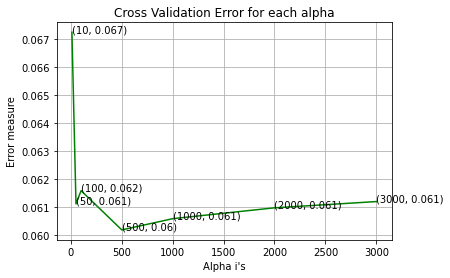

For values of best alpha =  500 The train log loss is: 0.026654120030133246
For values of best alpha =  500 The cross validation log loss is: 0.06019346936740513
For values of best alpha =  500 The test log loss is: 0.06674030044080187


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  1.4000000000000001
-------------------------------------------------- Confusion matrix --------------------------------------------------


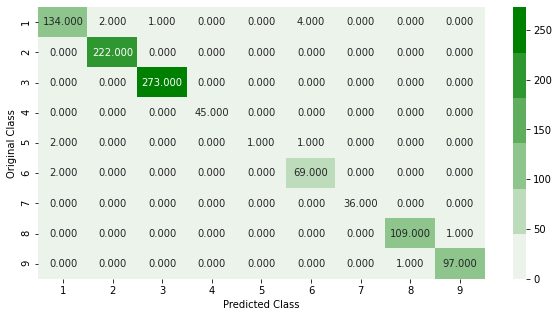

-------------------------------------------------- Precision matrix --------------------------------------------------


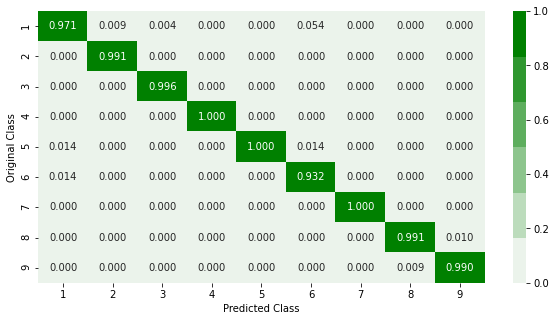

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


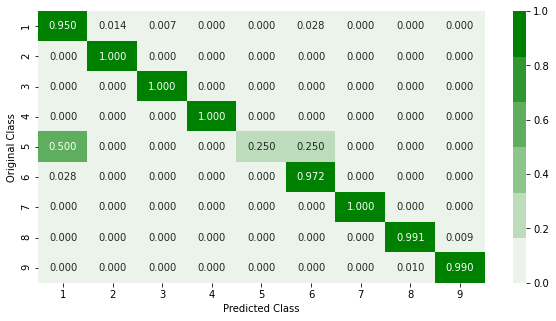

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.3.3 XGBoost Classifier on asm image features and bytes unigram features

log_loss for c =  10 is 0.0971193991978453
log_loss for c =  50 is 0.06072355026016034
log_loss for c =  100 is 0.05658491799193449
log_loss for c =  500 is 0.05226666725939278
log_loss for c =  1000 is 0.05294347264208083
log_loss for c =  2000 is 0.05290089497065042
log_loss for c =  3000 is 0.052897026253120726


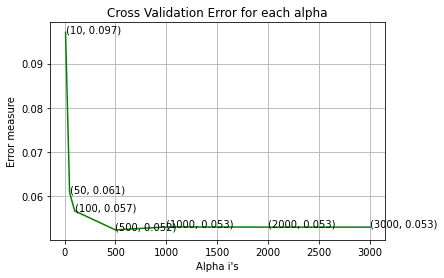

For values of best alpha =  500 The train log loss is: 0.025331073542642475
For values of best alpha =  500 The cross validation log loss is: 0.052897026253120726
For values of best alpha =  500 The test log loss is: 0.040408087028660236


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  0.5
-------------------------------------------------- Confusion matrix --------------------------------------------------


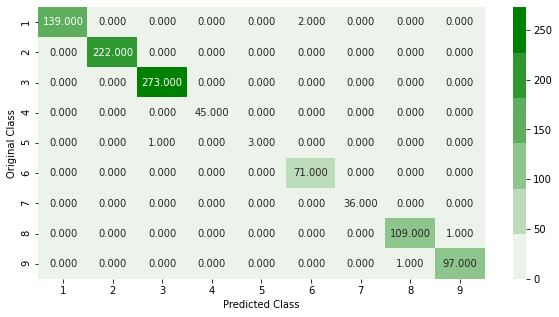

-------------------------------------------------- Precision matrix --------------------------------------------------


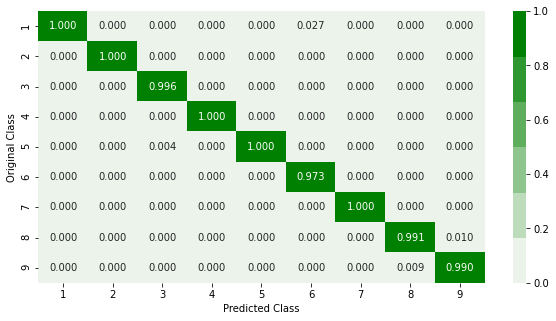

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


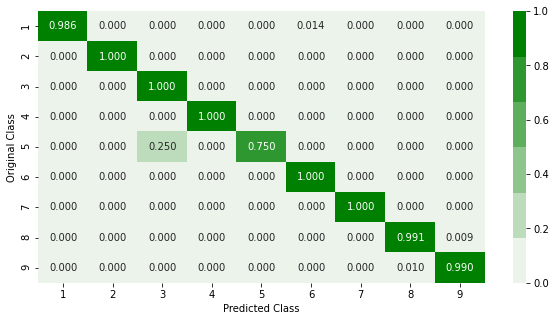

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

## 5.4 Combining asm image features and top 52 asm features

In [ ]:
top_asm_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/asmoutputfile.csv")
top_asm_df

ID  HEADER:  .text:  .Pav:  ...  edi  ebp  esp  eip
0      01kcPWA9K2BOxQeS5Rju       19     744      0  ...    0   17   48   29
1      1E93CpP60RHFNiT5Qfvn       17     838      0  ...    0   14    0   20
2      3ekVow2ajZHbTnBcsDfX       17     427      0  ...    0   11    0    9
3      3X2nY7iQaPBIWDrAZqJe       17     227      0  ...    0    8    0    6
4      46OZzdsSKDCFV8h7XWxf       17     402      0  ...    0   11    0   11
...                     ...      ...     ...    ...  ...  ...  ...  ...  ...
10863  kqvJp5E0wbWgu9mnzSQB        0    5062      0  ...    0    7   22   81
10864  KQwj9O6dlPxNyf8zW0gp        0    3520      0  ...    0   13    0  167
10865  KRNHAm094TC7OJfEPp8h        0   82940      0  ...    0    3   36  154
10866  ksKnqcBVTC0a3zSGoveR        0   13682      0  ...    0    4   30  116
10867  kSNnYl3ZLvB2WI7V4iEt        0    6003      0  ...    0   18   22  155

[10868 rows x 52 columns]

In [ ]:
top_asm_df = normalize(top_asm_df)
top_asm_df.head(2)

ID   HEADER:    .text:  ...       ebp       esp       eip
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  ...  0.030797  0.001468  0.003173
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  ...  0.025362  0.000000  0.002188

[2 rows x 52 columns]

In [ ]:
asm_size_byte = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/asm_with_size.csv").drop("Unnamed: 0",axis=1)
asm_size_byte.head(2)

ID   size_asm  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2

In [ ]:
result_asm = pd.merge(top_asm_df,asm_size_byte,on='ID',how='left')
result_asm.head(2)

ID   HEADER:    .text:  ...       eip  size_asm  Class
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  ...  0.003173   0.07819      1
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  ...  0.002188   0.06340      1

[2 rows x 54 columns]

In [ ]:
result_x = pd.merge(asm_image_df,result_asm, on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x

ASM_1  ASM_2  ASM_3  ASM_4  ...       ebp       esp       eip   size_asm
0      72.0   69.0   65.0   68.0  ...  0.007246  0.000000  0.000000   0.197794
1      72.0   69.0   65.0   68.0  ...  0.007246  0.000000  0.000000   0.178558
2      72.0   69.0   65.0   68.0  ...  0.021739  0.000000  0.004267   0.119880
3      72.0   69.0   65.0   68.0  ...  0.009058  0.000000  0.006456   0.671528
4      72.0   69.0   65.0   68.0  ...  0.027174  0.000000  0.008316   0.973575
...     ...    ...    ...    ...  ...       ...       ...       ...        ...
4995   72.0   69.0   65.0   68.0  ...  0.021739  0.000000  0.004267   0.260213
4996   72.0   69.0   65.0   68.0  ...  0.043478  0.000000  0.011817   7.553236
4997   72.0   69.0   65.0   68.0  ...  0.014493  0.000000  0.004377   0.651706
4998   72.0   69.0   65.0   68.0  ...  0.063406  0.000000  0.062479  19.887977
4999   46.0  122.0  101.0  110.0  ...  0.048913  0.000673  0.024620  13.102784

[5000 rows x 849 columns]

### 5.4.1 Train Test split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 849) (3200,)
(800, 849) (800,)
(1000, 849) (1000,)


### 5.4.2 Random Forest Classifier on asm image features and top 52 asm features

log_loss for c =  10 is 0.04164691892071298
log_loss for c =  50 is 0.03918020009503743
log_loss for c =  100 is 0.039103223385615955
log_loss for c =  500 is 0.039038792571919216
log_loss for c =  1000 is 0.03922190061721443
log_loss for c =  2000 is 0.03931254564619003
log_loss for c =  3000 is 0.03952082405636057


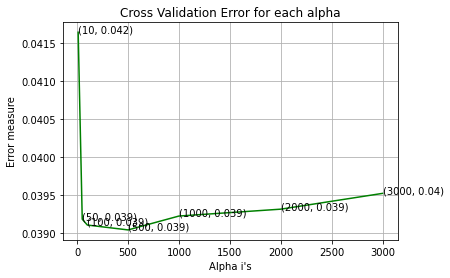

For values of best alpha =  500 The train log loss is: 0.023025174952967582
For values of best alpha =  500 The cross validation log loss is: 0.039038792571919216
For values of best alpha =  500 The test log loss is: 0.03225254469262412


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  0.7000000000000001
-------------------------------------------------- Confusion matrix --------------------------------------------------


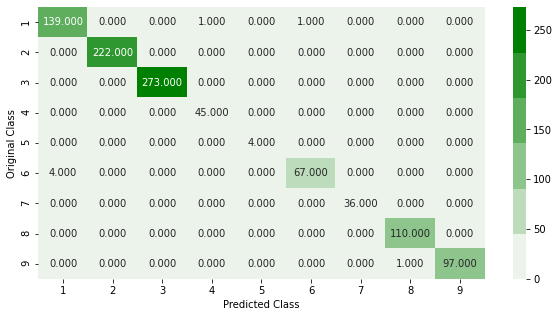

-------------------------------------------------- Precision matrix --------------------------------------------------


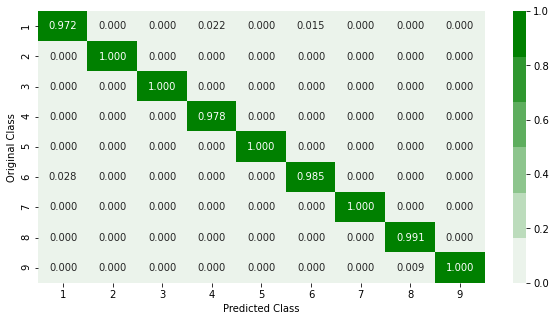

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


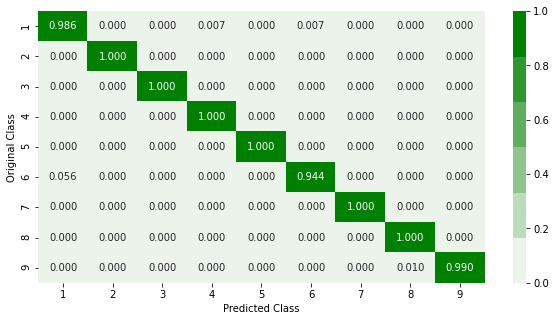

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.4.3 XGBoost Classifier on asm image features and top 52 asm features

log_loss for c =  10 is 0.10657151891788107
log_loss for c =  50 is 0.07184767388891886
log_loss for c =  100 is 0.05706798323963794
log_loss for c =  500 is 0.058335026561967825
log_loss for c =  1000 is 0.06083900778082972
log_loss for c =  2000 is 0.06095584917542864
log_loss for c =  3000 is 0.06095566063227434


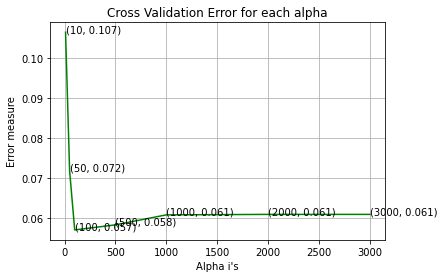

For values of best alpha =  100 The train log loss is: 0.019681541859279398
For values of best alpha =  100 The cross validation log loss is: 0.05706798323963794
For values of best alpha =  100 The test log loss is: 0.0358691930720225


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 72.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 101.1min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.5}


For values of best alpha =  100 The train log loss is: 0.018663336639270157
For values of best alpha =  100 The cross validation log loss is: 0.05190567671421386
For values of best alpha =  100 The test log loss is: 0.029822211808502058
Number of misclassified points  0.4
-------------------------------------------------- Confusion matrix --------------------------------------------------


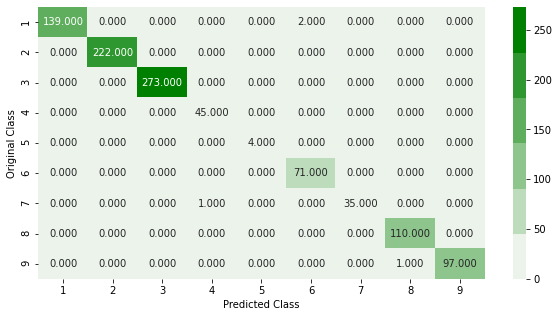

-------------------------------------------------- Precision matrix --------------------------------------------------


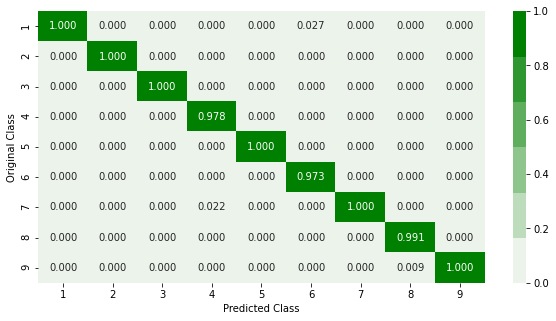

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


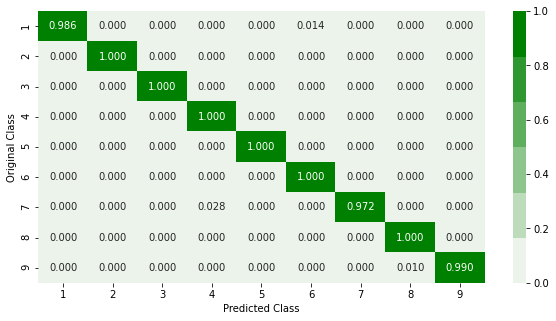

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.2,colsample_bytree=0.5,subsample=0.5,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

## 5.5 Combining bytes unigram+top 52 asm features+ asm image features

In [ ]:
asm_features = pd.merge(asm_image_df,result_asm, on='ID', how='left')
asm_features

ID  ASM_1  ASM_2  ...       eip   size_asm  Class
0     4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...  0.000000   0.197794      3
1     0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...  0.000000   0.178558      3
2     5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...  0.004267   0.119880      3
3     60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...  0.006456   0.671528      1
4     2LfPBwRadN3TulW86pvO   72.0   69.0  ...  0.008316   0.973575      8
...                    ...    ...    ...  ...       ...        ...    ...
4995  JZyx7pL2ueEr1Nwlj8aD   72.0   69.0  ...  0.004267   0.260213      3
4996  iDx4TemwdyfNER52l0Mn   72.0   69.0  ...  0.011817   7.553236      9
4997  iBT1K8E62rpmG73jN9VS   72.0   69.0  ...  0.004377   0.651706      1
4998  K1TBRacdPrvqOXCjDw2J   72.0   69.0  ...  0.062479  19.887977      8
4999  Izbos3ZTyWKju6k514NY   46.0  122.0  ...  0.024620  13.102784      2

[5000 rows x 854 columns]

In [ ]:
asm_byte_features = pd.merge(asm_features, result, on = 'ID', how = 'left')
asm_byte_features

ID  ASM_1  ASM_2  ...        ??      size  Class_y
0     4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...  0.107215  0.201100        3
1     0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...  0.107432  0.201100        3
2     5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...  0.105697  0.150520        3
3     60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...  0.001963  0.009960        1
4     2LfPBwRadN3TulW86pvO   72.0   69.0  ...  0.000636  0.006233        8
...                    ...    ...    ...  ...       ...       ...      ...
4995  JZyx7pL2ueEr1Nwlj8aD   72.0   69.0  ...  0.105083  0.150254        3
4996  iDx4TemwdyfNER52l0Mn   72.0   69.0  ...  0.000030  0.084499        9
4997  iBT1K8E62rpmG73jN9VS   72.0   69.0  ...  0.000659  0.009960        1
4998  K1TBRacdPrvqOXCjDw2J   72.0   69.0  ...  0.000072  0.050424        8
4999  Izbos3ZTyWKju6k514NY   46.0  122.0  ...  0.000859  0.117243        2

[5000 rows x 1113 columns]

In [ ]:
result_x = asm_byte_features
result_y = result_x['Class_y']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class_y'], axis=1)
result_x

ASM_1  ASM_2  ASM_3  ASM_4  ...        fe        ff        ??      size
0      72.0   69.0   65.0   68.0  ...  0.031030  0.013392  0.107215  0.201100
1      72.0   69.0   65.0   68.0  ...  0.033147  0.013204  0.107432  0.201100
2      72.0   69.0   65.0   68.0  ...  0.016350  0.009188  0.105697  0.150520
3      72.0   69.0   65.0   68.0  ...  0.002122  0.003183  0.001963  0.009960
4      72.0   69.0   65.0   68.0  ...  0.001222  0.003002  0.000636  0.006233
...     ...    ...    ...    ...  ...       ...       ...       ...       ...
4995   72.0   69.0   65.0   68.0  ...  0.016969  0.009778  0.105083  0.150254
4996   72.0   69.0   65.0   68.0  ...  0.070334  0.057748  0.000030  0.084499
4997   72.0   69.0   65.0   68.0  ...  0.004207  0.003263  0.000659  0.009960
4998   72.0   69.0   65.0   68.0  ...  0.010837  0.032140  0.000072  0.050424
4999   46.0  122.0  101.0  110.0  ...  0.036849  0.088473  0.000859  0.117243

[5000 rows x 1108 columns]

### 5.5.1 Train Test split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 1108) (3200,)
(800, 1108) (800,)
(1000, 1108) (1000,)


### 5.5.2 Random Forest Classifier on asm image features, bytes unigrams and top 52 asm features

log_loss for c =  10 is 0.034130227182772754
log_loss for c =  50 is 0.028355740346831304
log_loss for c =  100 is 0.026965477036037962
log_loss for c =  500 is 0.02648454328626336
log_loss for c =  1000 is 0.026541472518099504
log_loss for c =  2000 is 0.026592266514544143
log_loss for c =  3000 is 0.026540129969662356


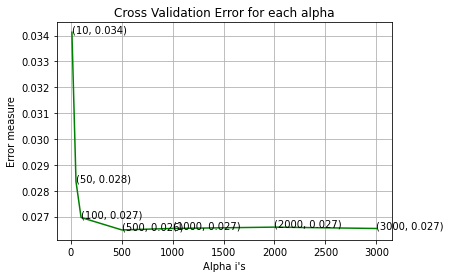

For values of best alpha =  500 The train log loss is: 0.020921332067144555
For values of best alpha =  500 The cross validation log loss is: 0.02648454328626336
For values of best alpha =  500 The test log loss is: 0.03941230358676328


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  0.5
-------------------------------------------------- Confusion matrix --------------------------------------------------


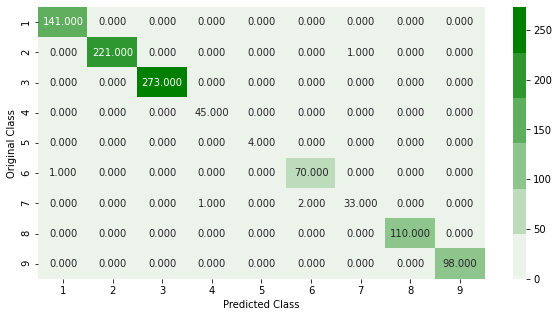

-------------------------------------------------- Precision matrix --------------------------------------------------


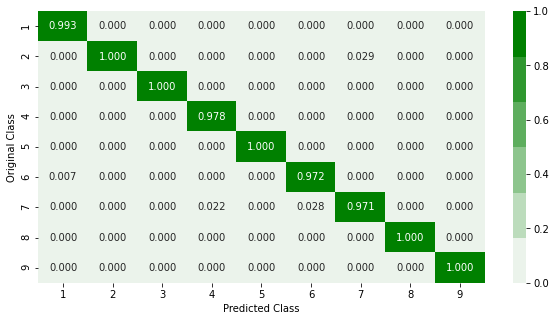

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


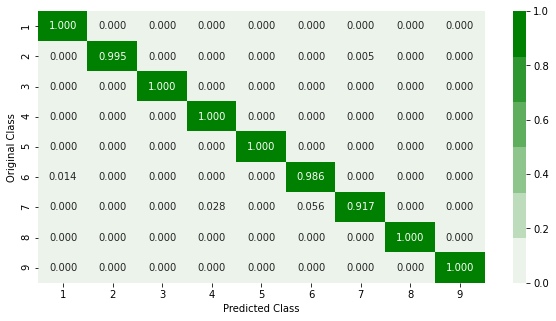

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.5.3 XGBoost Classifier on asm image features, bytes unigrams and top 52 asm features

log_loss for c =  10 is 0.032365167797375104
log_loss for c =  50 is 0.01784914219393242
log_loss for c =  100 is 0.016358634534401142
log_loss for c =  500 is 0.016533232345754763
log_loss for c =  1000 is 0.016534139791885717
log_loss for c =  2000 is 0.01653369447917465
log_loss for c =  3000 is 0.016533085766598055


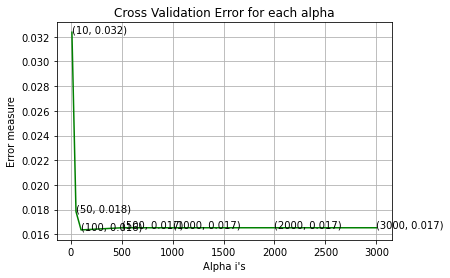

For values of best alpha =  100 The train log loss is: 0.015338631466737591
For values of best alpha =  100 The cross validation log loss is: 0.016358634534401142
For values of best alpha =  100 The test log loss is: 0.02420343761685679


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 60.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 76.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print(random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}


For values of best alpha =  100 The train log loss is: 0.015897705872599886
For values of best alpha =  100 The cross validation log loss is: 0.016734697269262102
For values of best alpha =  100 The test log loss is: 0.026936741186101905
Number of misclassified points  0.4
-------------------------------------------------- Confusion matrix --------------------------------------------------


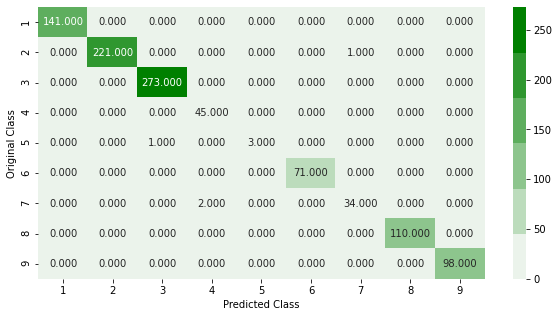

-------------------------------------------------- Precision matrix --------------------------------------------------


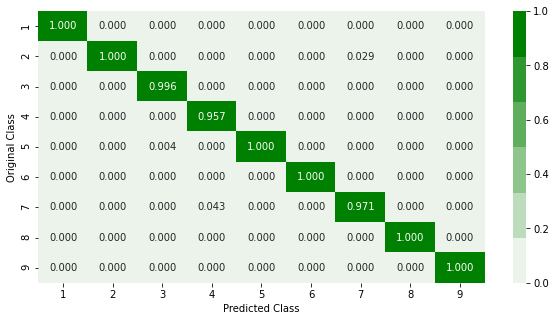

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


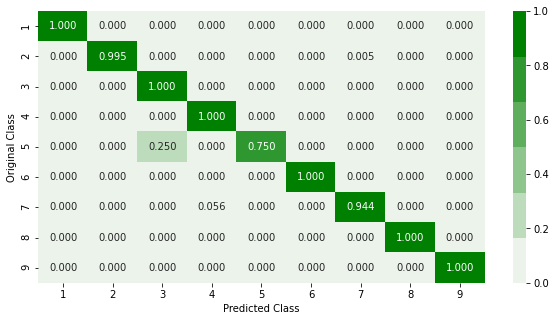

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.15,colsample_bytree=1,subsample=0.3,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

## 5.6 Combining bytes unigram + 2000 bytes bigram + 800 ASM image features + top 52 asm features

In [ ]:
bigrams_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bigrams_df.csv").drop("Unnamed: 0",axis=1)
bigrams_df

00 00     00 4c     70 00  ...     93 52     8b ba     00 1d
0     0.003505  0.000094  0.000643  ...  0.000000  0.000524  0.000111
1     0.001596  0.000207  0.000321  ...  0.000000  0.000000  0.000111
2     0.000749  0.000170  0.000276  ...  0.003126  0.003145  0.000056
3     0.009493  0.001545  0.004914  ...  0.000782  0.003145  0.000557
4     0.003050  0.144150  0.008542  ...  0.001563  0.019920  0.010135
...        ...       ...       ...  ...       ...       ...       ...
4995  0.001525  0.000320  0.000781  ...  0.010161  0.005766  0.001615
4996  0.075341  0.022631  0.050886  ...  0.005471  0.007863  0.087369
4997  0.002906  0.000339  0.000873  ...  0.000782  0.000000  0.000947
4998  0.001660  0.000415  0.000873  ...  0.016413  0.006815  0.001169
4999  0.001409  0.000283  0.000735  ...  0.005471  0.004194  0.001503

[5000 rows x 2000 columns]

In [ ]:
trimmed_labels = pd.read_csv('trimmed_labels.csv').drop("Unnamed: 0",axis=1)
trimmed_labels

Id  Class            complete_file_id
0     01kcPWA9K2BOxQeS5Rju      1  01kcPWA9K2BOxQeS5Rju.bytes
1     05EeG39MTRrI6VY21DPd      1  05EeG39MTRrI6VY21DPd.bytes
2     0AwWs42SUQ19mI7eDcTC      1  0AwWs42SUQ19mI7eDcTC.bytes
3     0DqUX5rkg3IbMY6BLGCE      1  0DqUX5rkg3IbMY6BLGCE.bytes
4     0eaNKwluUmkYdIvZ923c      1  0eaNKwluUmkYdIvZ923c.bytes
...                    ...    ...                         ...
4995  K7HTMuk6fo2wrhyWxY43      9  K7HTMuk6fo2wrhyWxY43.bytes
4996  k8qrhNTAG54fSl6jDtVa      9  k8qrhNTAG54fSl6jDtVa.bytes
4997  kAtomObScfxVW1DKXUla      9  kAtomObScfxVW1DKXUla.bytes
4998  kchO8uQA9Me4H3jZTSgm      9  kchO8uQA9Me4H3jZTSgm.bytes
4999  KF7NGoQSk8v9OE0nrwy2      9  KF7NGoQSk8v9OE0nrwy2.bytes

[5000 rows x 3 columns]

In [ ]:
bytes2000features = bigrams_df.assign(ID = trimmed_labels['Id'])
bytes2000features

00 00     00 4c     70 00  ...     8b ba     00 1d                    ID
0     0.003505  0.000094  0.000643  ...  0.000524  0.000111  01kcPWA9K2BOxQeS5Rju
1     0.001596  0.000207  0.000321  ...  0.000000  0.000111  05EeG39MTRrI6VY21DPd
2     0.000749  0.000170  0.000276  ...  0.003145  0.000056  0AwWs42SUQ19mI7eDcTC
3     0.009493  0.001545  0.004914  ...  0.003145  0.000557  0DqUX5rkg3IbMY6BLGCE
4     0.003050  0.144150  0.008542  ...  0.019920  0.010135  0eaNKwluUmkYdIvZ923c
...        ...       ...       ...  ...       ...       ...                   ...
4995  0.001525  0.000320  0.000781  ...  0.005766  0.001615  K7HTMuk6fo2wrhyWxY43
4996  0.075341  0.022631  0.050886  ...  0.007863  0.087369  k8qrhNTAG54fSl6jDtVa
4997  0.002906  0.000339  0.000873  ...  0.000000  0.000947  kAtomObScfxVW1DKXUla
4998  0.001660  0.000415  0.000873  ...  0.006815  0.001169  kchO8uQA9Me4H3jZTSgm
4999  0.001409  0.000283  0.000735  ...  0.004194  0.001503  KF7NGoQSk8v9OE0nrwy2

[5000 rows x 2001 columns]

In [ ]:
final_df = pd.merge(asm_byte_features,bytes2000features,on="ID",how='left')
final_df

ID  ASM_1  ASM_2  ...     93 52     8b ba     00 1d
0     4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...  0.001563  0.000000  0.000501
1     0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...  0.005471  0.000000  0.000780
2     5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...  0.000000  0.000000  0.000724
3     60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...  0.000000  0.001048  0.000835
4     2LfPBwRadN3TulW86pvO   72.0   69.0  ...  0.001563  0.000524  0.000000
...                    ...    ...    ...  ...       ...       ...       ...
4995  JZyx7pL2ueEr1Nwlj8aD   72.0   69.0  ...  0.004689  0.003145  0.003620
4996  iDx4TemwdyfNER52l0Mn   72.0   69.0  ...  0.003126  0.000000  0.106915
4997  iBT1K8E62rpmG73jN9VS   72.0   69.0  ...  0.000000  0.000524  0.000278
4998  K1TBRacdPrvqOXCjDw2J   72.0   69.0  ...  0.000782  0.005766  0.000780
4999  Izbos3ZTyWKju6k514NY   46.0  122.0  ...  0.006253  0.005766  0.001169

[5000 rows x 3113 columns]

In [ ]:
final_df['Class_y']

0       3
1       3
2       3
3       1
4       8
       ..
4995    3
4996    9
4997    1
4998    8
4999    2
Name: Class_y, Length: 5000, dtype: int64

In [ ]:
result_x = final_df
result_y = result_x['Class_y']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class_y'], axis=1)
result_x

ASM_1  ASM_2  ASM_3  ASM_4  ...     a8 01     93 52     8b ba     00 1d
0      72.0   69.0   65.0   68.0  ...  0.000065  0.001563  0.000000  0.000501
1      72.0   69.0   65.0   68.0  ...  0.000065  0.005471  0.000000  0.000780
2      72.0   69.0   65.0   68.0  ...  0.000043  0.000000  0.000000  0.000724
3      72.0   69.0   65.0   68.0  ...  0.000022  0.000000  0.001048  0.000835
4      72.0   69.0   65.0   68.0  ...  0.000022  0.001563  0.000524  0.000000
...     ...    ...    ...    ...  ...       ...       ...       ...       ...
4995   72.0   69.0   65.0   68.0  ...  0.000347  0.004689  0.003145  0.003620
4996   72.0   69.0   65.0   68.0  ...  0.000130  0.003126  0.000000  0.106915
4997   72.0   69.0   65.0   68.0  ...  0.000022  0.000000  0.000524  0.000278
4998   72.0   69.0   65.0   68.0  ...  0.000521  0.000782  0.005766  0.000780
4999   46.0  122.0  101.0  110.0  ...  0.000260  0.006253  0.005766  0.001169

[5000 rows x 3108 columns]

### 5.6.1 Train Test Split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(3200, 3108) (3200,)
(800, 3108) (800,)
(1000, 3108) (1000,)


### 5.6.2 XGBoost Classifier

log_loss for c =  10 is 0.03795315378777632
log_loss for c =  50 is 0.022016254247443568
log_loss for c =  100 is 0.018848730993588532
log_loss for c =  500 is 0.019098890194770925
log_loss for c =  1000 is 0.019097638588168202
log_loss for c =  2000 is 0.01909812356708634
log_loss for c =  3000 is 0.019097917970234114


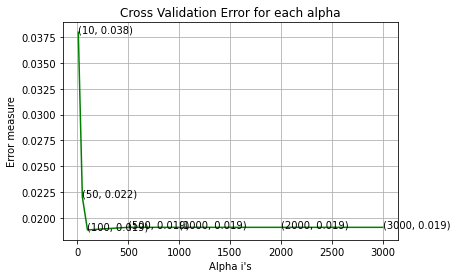

For values of best alpha =  100 The train log loss is: 0.015600558468866267
For values of best alpha =  100 The cross validation log loss is: 0.018848730993588532
For values of best alpha =  100 The test log loss is: 0.023837099692724222


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 146.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 172.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 205.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 251.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print(random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 1}


For values of best alpha =  1000 The train log loss is: 0.01568296204990853
For values of best alpha =  1000 The cross validation log loss is: 0.02783522491611953
For values of best alpha =  1000 The test log loss is: 0.024492721555488737
Number of misclassified points  0.2
-------------------------------------------------- Confusion matrix --------------------------------------------------


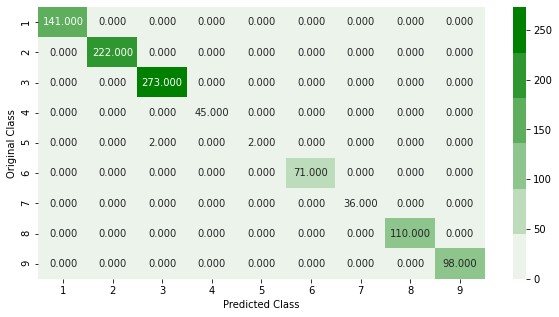

-------------------------------------------------- Precision matrix --------------------------------------------------


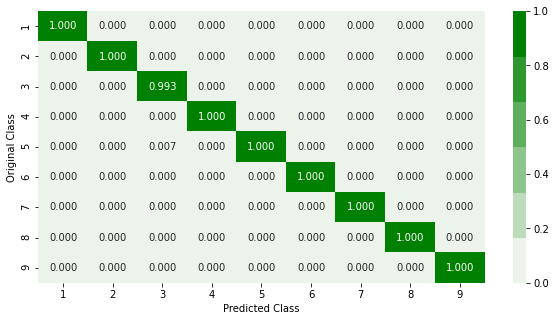

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


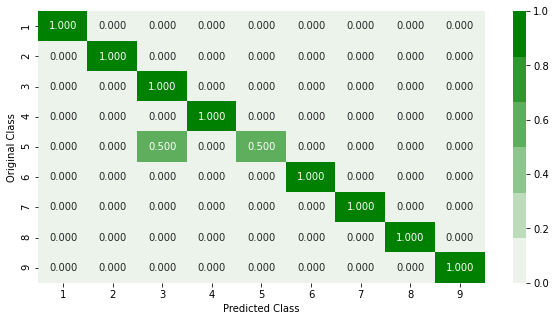

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.03,colsample_bytree=1,subsample=0.5,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

best_alpha = 1000  
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

I have tried using n_estimators = 100 but this resulted in higher test log loss

For values of best alpha =  100 The train log loss is: 0.019049740001157764
For values of best alpha =  100 The cross validation log loss is: 0.03561004991746387
For values of best alpha =  100 The test log loss is: 0.029349579654960267
Number of misclassified points  0.3
-------------------------------------------------- Confusion matrix --------------------------------------------------


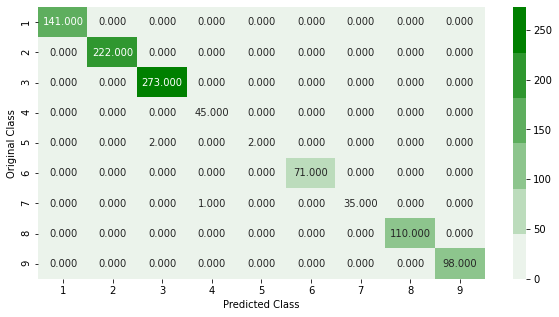

-------------------------------------------------- Precision matrix --------------------------------------------------


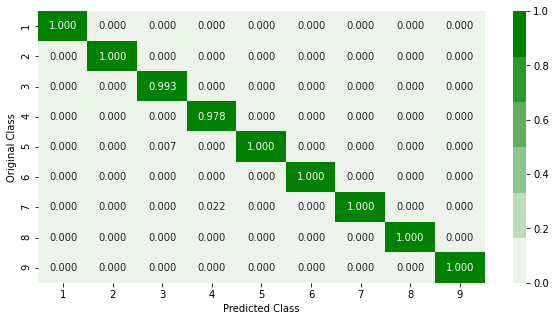

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


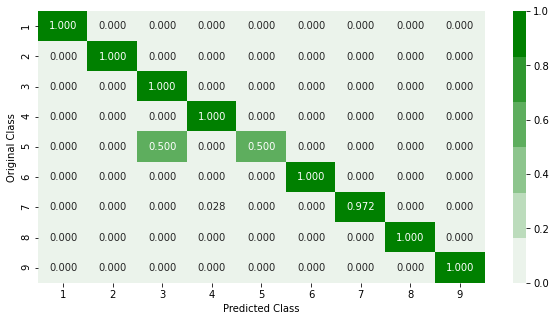

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
x_cfl=XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.03,colsample_bytree=1,subsample=0.5,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

best_alpha = 100
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

## 5.7 Using all the ASM files for image feature and combining it with bytes unigrams and top 52 ASM features

I decided to try using all the 10868 ASM files for creating the image features and then combining it with bytes unigrams and top 52 ASM image features to check whether I get an improvement in the test log loss.

In [ ]:
asm_image_df.shape

(5000, 801)

In [ ]:
asm_image_df.head(2)

ID  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0  4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...     61.0     61.0     61.0
1  0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...     61.0     61.0     61.0

[2 rows x 801 columns]

In [ ]:
result_asm.shape

(10868, 54)

In [ ]:
result_asm.head(2)

ID   HEADER:    .text:  ...       eip  size_asm  Class
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  ...  0.003173   0.07819      1
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  ...  0.002188   0.06340      1

[2 rows x 54 columns]

In [ ]:
result.shape

(10868, 260)

In [ ]:
result.head(2)

ID         0         1  ...        ??      size  Class
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  ...  0.000129  0.092219      9
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  ...  0.000606  0.121236      2

[2 rows x 260 columns]

For the below code blocks, the output is not visible because I had run this code in a different file. If the output for the below cells is required please let me know if I should provide the other file. For now I have not attached the file in my submission.

In [ ]:
byte_file_list=[]
asm_file_list=[]
for i in data:
  if (i.endswith("bytes")):
    byte_file_list.append(i)
  elif (i.endswith("asm")):
    asm_file_list.append(i)

In [ ]:
print('Number of ASM files',len(asm_file_list))

In [ ]:
# Finding only the file names of ASM files and storing the file names in an array
asm_file_name=[]
for i in range(0,len(asm_file_list)):
  asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
from google.colab import files
trimmed_labels = files.upload()

In [ ]:
trimmed_labels_df = pd.read_csv('trimmed_labels.csv').drop("Unnamed: 0",axis=1)
trimmed_labels_df.head(2)

In [ ]:
#Creating a new column asm_file_id by adding .asm to the filename column
trimmed_labels_df['asm_file_id'] = trimmed_labels_df['Id'].astype(str) + '.asm'
trimmed_labels_df

In [ ]:
list1 = asm_file_name
list2 = list(trimmed_labels_df['asm_file_id'])
print(len(list1))
print(len(list2))

In [ ]:
#https://stackoverflow.com/a/34288440
set2 = set(list2)
final_list = [x for x in list1 if x in set2]
len(final_list)

In [ ]:
train_labels = pd.read_csv('/content/trainLabels.csv')
train_labels

In [ ]:
#Creating a new column asm_file_id by adding .asm to the filename column
train_labels['asm_file_id'] = train_labels['Id'].astype(str) + '.asm'
train_labels

In [ ]:
#https://stackoverflow.com/a/3462202
temp1 = train_labels['asm_file_id']
s = set(final_list)
temp3 = [x for x in temp1 if x not in s]
temp3

In [ ]:
len(temp3)

In [ ]:
asmbatch1 = temp3[:1000]
len(asmbatch1)

In [ ]:
asmbatch2 = temp3[1000:2000]
len(asmbatch2)

In [ ]:
asmbatch3 = temp3[2000:3000]
len(asmbatch3)

In [ ]:
asmbatch4 = temp3[3000:4000]
len(asmbatch4)

In [ ]:
asmbatch5 = temp3[4000:5000]
len(asmbatch5)

In [ ]:
asmbatch6 = temp3[5000:5868]
len(asmbatch6)

### 5.7.1 Processing Batch 1 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch1):
  !7z e train.7z -o/content/asmbatch1 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch1")
files = []
asm_matrix = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files.append(filename)
  file = open('asmbatch1/'+asmfile,'rb') #decodes asm to bytes
  arr = array.array('B') # an empty unsigned char array
  arr.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix
  asm_matrix[i:] = arr[:800]

In [ ]:
print(files)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data = np.concatenate((np.array(files)[:, None], asm_matrix), axis = 1)
asm_matrix_data

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = ['filename']+[('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_image_df_batch1 = pd.DataFrame(asm_matrix_data, columns = column_names)
asm_image_df_batch1

In [ ]:
asm_image_df_batch1.to_csv('asm_image_df_batch1.csv')

In [ ]:
!rm -rf asmbatch1/

### 5.7.2 Processing Batch 2 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch2):
  !7z e train.7z -o/content/asmbatch2 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch2")
files2 = []
asm_matrix2 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files2.append(filename)
  file = open('asmbatch2/'+asmfile,'rb') #decodes asm to bytes
  arr2 = array.array('B') # an empty unsigned char array
  arr2.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix2
  asm_matrix2[i:] = arr2[:800]

In [ ]:
print(files2)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data2 = np.concatenate((np.array(files2)[:, None], asm_matrix2), axis = 1)
asm_matrix_data2

In [ ]:
asm_image_df_batch2 = pd.DataFrame(asm_matrix_data2, columns = column_names)
asm_image_df_batch2

In [ ]:
asm_image_df_batch2.to_csv('asm_image_df_batch2.csv')

In [ ]:
!rm -rf asmbatch2/

### 5.7.3 Processing Batch 3 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch3):
  !7z e train.7z -o/content/asmbatch3 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch3")
files3 = []
asm_matrix3 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files3.append(filename)
  file = open('asmbatch3/'+asmfile,'rb') #decodes asm to bytes
  arr3 = array.array('B') # an empty unsigned char array
  arr3.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix3
  asm_matrix3[i:] = arr3[:800]

In [ ]:
print(files3)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data3 = np.concatenate((np.array(files3)[:, None], asm_matrix3), axis = 1)
asm_matrix_data3

In [ ]:
asm_image_df_batch3 = pd.DataFrame(asm_matrix_data3, columns = column_names)
asm_image_df_batch3

In [ ]:
asm_image_df_batch3.to_csv('asm_image_df_batch3.csv')

In [ ]:
!rm -rf asmbatch3/

### 5.7.4 Processing Batch 4 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch4):
  !7z e train.7z -o/content/asmbatch4 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch4")
files4 = []
asm_matrix4 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files4.append(filename)
  file = open('asmbatch4/'+asmfile,'rb') #decodes asm to bytes
  arr4 = array.array('B') # an empty unsigned char array
  arr4.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix3
  asm_matrix4[i:] = arr4[:800]

In [ ]:
print(files4)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data4 = np.concatenate((np.array(files4)[:, None], asm_matrix4), axis = 1)
asm_matrix_data4

In [ ]:
asm_image_df_batch4 = pd.DataFrame(asm_matrix_data4, columns = column_names)
asm_image_df_batch4

In [ ]:
asm_image_df_batch4.to_csv('asm_image_df_batch4.csv')

In [ ]:
!rm -rf asmbatch4/

### 5.7.5 Processing Batch 5 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch5):
  !7z e train.7z -o/content/asmbatch5 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch5")
files5 = []
asm_matrix5 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files5.append(filename)
  file = open('asmbatch5/'+asmfile,'rb') #decodes asm to bytes
  arr5 = array.array('B') # an empty unsigned char array
  arr5.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix5
  asm_matrix5[i:] = arr5[:800]

In [ ]:
print(files5)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data5 = np.concatenate((np.array(files5)[:, None], asm_matrix5), axis = 1)
asm_matrix_data5

In [ ]:
asm_image_df_batch5 = pd.DataFrame(asm_matrix_data5, columns = column_names)
asm_image_df_batch5

In [ ]:
asm_image_df_batch5.to_csv('asm_image_df_batch5.csv')

In [ ]:
!rm -rf asmbatch5/

### 5.7.6 Processing Batch 6 of ASM files

In [ ]:
count = 0
for file in tqdm(asmbatch6):
  !7z e train.7z -o/content/asmbatch6 *$file -r
  count+=1

In [ ]:
import array
from tqdm import tqdm

asmfiles = os.listdir("asmbatch6")
files6 = []
asm_matrix6 = np.zeros((len(asmfiles),800))
for i, asmfile in tqdm(enumerate(asmfiles)):
  filename = asmfile.split(".")[0]
  files6.append(filename)
  file = open('asmbatch6/'+asmfile,'rb') #decodes asm to bytes
  arr6 = array.array('B') # an empty unsigned char array
  arr6.frombytes(file.read()) #adding bytes representationof file to arr
  #Adding rows in to asm_matrix6
  asm_matrix6[i:] = arr6[:800]

In [ ]:
print(files6)

In [ ]:
#https://stackoverflow.com/a/40519894
asm_matrix_data6 = np.concatenate((np.array(files6)[:, None], asm_matrix6), axis = 1)
asm_matrix_data6

In [ ]:
asm_image_df_batch6 = pd.DataFrame(asm_matrix_data6, columns = column_names)
asm_image_df_batch6

In [ ]:
asm_image_df_batch6.to_csv('asm_image_df_batch6.csv')

In [ ]:
!rm -rf asmbatch6/

### 5.7.7 Combining the 6 batches of ASM files

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_df_batch6.csv')

In [ ]:
#https://www.statology.org/stack-pandas-dataframes/
asm_image_2ndhalf = pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)
asm_image_2ndhalf

In [ ]:
asm_image_2ndhalf.to_csv('asm_image_2ndhalf.csv')

In [ ]:
asm_image_2ndhalf = pd.read_csv('/content/drive/MyDrive/ASM files 5868/asm_image_2ndhalf.csv').drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
asm_image_2ndhalf

filename  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0     Ewqh9mNWcFsjG0fr5DMB   72.0   69.0  ...    108.0     97.0    116.0
1     eWR4wdHSfusGVlc8t2rg   72.0   69.0  ...    108.0     97.0    116.0
2     3aUTHQpJqC8czb1yohmA   72.0   69.0  ...    108.0     97.0    116.0
3     58nzDrNVjhdog7QYkxe4   72.0   69.0  ...    108.0     97.0    116.0
4     Hz8NEvBRqL31AdfQgmFn   72.0   69.0  ...     61.0     61.0     61.0
...                    ...    ...    ...  ...      ...      ...      ...
5863  HXoz2NOQtTgJ04RsL5ME   72.0   69.0  ...     61.0     61.0     61.0
5864  hmMISGQjc97JwvlXixWT   72.0   69.0  ...     61.0     61.0     61.0
5865  3Oy1Wo7T0QxYILi8mlVg   72.0   69.0  ...     61.0     61.0     61.0
5866  H1yNEYo4ZLxmKklg2Mnz   72.0   69.0  ...     61.0     61.0     61.0
5867  hURnIpZK4frFmclgGCeJ   72.0   69.0  ...     58.0     48.0     66.0

[5868 rows x 801 columns]

In [ ]:
asm_image_2ndhalf = asm_image_2ndhalf.rename(columns={"filename":"ID"})
asm_image_2ndhalf.head(2)

ID  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0  Ewqh9mNWcFsjG0fr5DMB   72.0   69.0  ...    108.0     97.0    116.0
1  eWR4wdHSfusGVlc8t2rg   72.0   69.0  ...    108.0     97.0    116.0

[2 rows x 801 columns]

Combining the ASM image feature files for first 5000 files and the ASM image features for the latter 5868 files. This gives us a dataframe containing the 800 ASM image features for all the 10868 ASM files

In [ ]:
combined_asm_image_df = pd.concat([asm_image_df,asm_image_2ndhalf],ignore_index=True)
combined_asm_image_df

ID  ASM_1  ASM_2  ...  ASM_798  ASM_799  ASM_800
0      4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...     61.0     61.0     61.0
1      0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...     61.0     61.0     61.0
2      5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...     61.0     61.0     61.0
3      60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...    108.0     97.0    116.0
4      2LfPBwRadN3TulW86pvO   72.0   69.0  ...     61.0     61.0     61.0
...                     ...    ...    ...  ...      ...      ...      ...
10863  HXoz2NOQtTgJ04RsL5ME   72.0   69.0  ...     61.0     61.0     61.0
10864  hmMISGQjc97JwvlXixWT   72.0   69.0  ...     61.0     61.0     61.0
10865  3Oy1Wo7T0QxYILi8mlVg   72.0   69.0  ...     61.0     61.0     61.0
10866  H1yNEYo4ZLxmKklg2Mnz   72.0   69.0  ...     61.0     61.0     61.0
10867  hURnIpZK4frFmclgGCeJ   72.0   69.0  ...     58.0     48.0     66.0

[10868 rows x 801 columns]

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
checklist = combined_asm_image_df['ID'].duplicated(keep=False)==True
checklist

0        False
1        False
2        False
3        False
4        False
         ...  
10863    False
10864    False
10865    False
10866    False
10867    False
Name: ID, Length: 10868, dtype: bool

In [ ]:
count = 0
for i in list(checklist):
  if i==True:
    count+=1
  else:
    print("No duplicate values")

In [ ]:
count

0

In [ ]:
combined_asm_image_df.to_csv('combined_asm_image_df.csv')

In [ ]:
!cp combined_asm_image_df.csv '/content/drive/MyDrive/ASM files 5868'
!ls -lt '/content/drive/MyDrive/ASM files 5868'

total 89415
-rw------- 1 root root 43994001 May 10 05:49 combined_asm_image_df.csv
-rw------- 1 root root 23780573 May 10 05:03 asm_image_2ndhalf.csv
-rw------- 1 root root  3494540 May  8 07:45 asm_image_df_batch6.csv
-rw------- 1 root root  4029123 May  7 09:59 asm_image_df_batch5.csv
-rw------- 1 root root  4035726 May  5 09:24 asm_image_df_batch4.csv
-rw------- 1 root root  4052244 May  4 13:33 asm_image_df_batch3.csv
-rw------- 1 root root  4107992 May  4 09:24 asm_image_df_batch2.csv
-rw------- 1 root root  4064217 May  3 09:40 asm_image_df_batch1.csv


Below I have combined the dataframe containing the top 52 ASM features with the dataframe containing ASM image features for all the 10868 files

In [ ]:
asm_features = pd.merge(combined_asm_image_df,result_asm, on='ID', how='left')
asm_features

ID  ASM_1  ASM_2  ...       eip   size_asm  Class
0      4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...  0.000000   0.197794      3
1      0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...  0.000000   0.178558      3
2      5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...  0.004267   0.119880      3
3      60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...  0.006456   0.671528      1
4      2LfPBwRadN3TulW86pvO   72.0   69.0  ...  0.008316   0.973575      8
...                     ...    ...    ...  ...       ...        ...    ...
10863  HXoz2NOQtTgJ04RsL5ME   72.0   69.0  ...  0.017398  15.190316      8
10864  hmMISGQjc97JwvlXixWT   72.0   69.0  ...  0.009848   1.387064      9
10865  3Oy1Wo7T0QxYILi8mlVg   72.0   69.0  ...  0.009520   1.231828      9
10866  H1yNEYo4ZLxmKklg2Mnz   72.0   69.0  ...  0.042565   7.249698      9
10867  hURnIpZK4frFmclgGCeJ   72.0   69.0  ...  0.012255   4.150058      8

[10868 rows x 854 columns]

The below dataframe is a combination of ASM image features+Top 52 ASM features+bytes unigrams

In [ ]:
final_df = pd.merge(asm_features,result,on='ID', how='left')
final_df

ID  ASM_1  ASM_2  ...        ??      size  Class_y
0      4bP0fpWK9ygln6RwLCmY   72.0   69.0  ...  0.107215  0.201100        3
1      0BKcmNv4iGY2hsVSaXJ6   72.0   69.0  ...  0.107432  0.201100        3
2      5CiGOStRIX3ayFUrAeoQ   72.0   69.0  ...  0.105697  0.150520        3
3      60gR3qnjoYPf4rpbCOSk   72.0   69.0  ...  0.001963  0.009960        1
4      2LfPBwRadN3TulW86pvO   72.0   69.0  ...  0.000636  0.006233        8
...                     ...    ...    ...  ...       ...       ...      ...
10863  HXoz2NOQtTgJ04RsL5ME   72.0   69.0  ...  0.029539  0.075182        8
10864  hmMISGQjc97JwvlXixWT   72.0   69.0  ...  0.000025  0.009694        9
10865  3Oy1Wo7T0QxYILi8mlVg   72.0   69.0  ...  0.000025  0.009428        9
10866  H1yNEYo4ZLxmKklg2Mnz   72.0   69.0  ...  0.000110  0.012356        9
10867  hURnIpZK4frFmclgGCeJ   72.0   69.0  ...  0.002873  0.010759        8

[10868 rows x 1113 columns]

In [ ]:
result_x = final_df
result_y = result_x['Class_y']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class_y'], axis=1)
result_x

ASM_1  ASM_2  ASM_3  ASM_4  ...        fe        ff        ??      size
0       72.0   69.0   65.0   68.0  ...  0.031030  0.013392  0.107215  0.201100
1       72.0   69.0   65.0   68.0  ...  0.033147  0.013204  0.107432  0.201100
2       72.0   69.0   65.0   68.0  ...  0.016350  0.009188  0.105697  0.150520
3       72.0   69.0   65.0   68.0  ...  0.002122  0.003183  0.001963  0.009960
4       72.0   69.0   65.0   68.0  ...  0.001222  0.003002  0.000636  0.006233
...      ...    ...    ...    ...  ...       ...       ...       ...       ...
10863   72.0   69.0   65.0   68.0  ...  0.015981  0.013304  0.029539  0.075182
10864   72.0   69.0   65.0   68.0  ...  0.008825  0.009657  0.000025  0.009694
10865   72.0   69.0   65.0   68.0  ...  0.004072  0.009339  0.000025  0.009428
10866   72.0   69.0   65.0   68.0  ...  0.002340  0.003048  0.000110  0.012356
10867   72.0   69.0   65.0   68.0  ...  0.002252  0.003377  0.002873  0.010759

[10868 rows x 1108 columns]

### 5.7.8 Train Test Split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print(X_train_merge.shape,y_train_merge.shape)
print(X_cv_merge.shape,y_cv_merge.shape)
print(X_test_merge.shape,y_test_merge.shape)

(6955, 1108) (6955,)
(1739, 1108) (1739,)
(2174, 1108) (2174,)


### 5.7.9 Random Forest Classifier

log_loss for c =  10 is 0.016304701173137173
log_loss for c =  50 is 0.014943032261866244
log_loss for c =  100 is 0.015195734609934553
log_loss for c =  500 is 0.015076053879484411
log_loss for c =  1000 is 0.015125500470197261
log_loss for c =  2000 is 0.015105873360221464
log_loss for c =  3000 is 0.015090710998185366


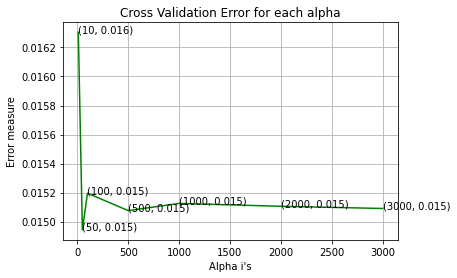

For values of best alpha =  50 The train log loss is: 0.01083637258361327
For values of best alpha =  50 The cross validation log loss is: 0.014943032261866244
For values of best alpha =  50 The test log loss is: 0.020233591028129206


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  0.3219871205151794
-------------------------------------------------- Confusion matrix --------------------------------------------------


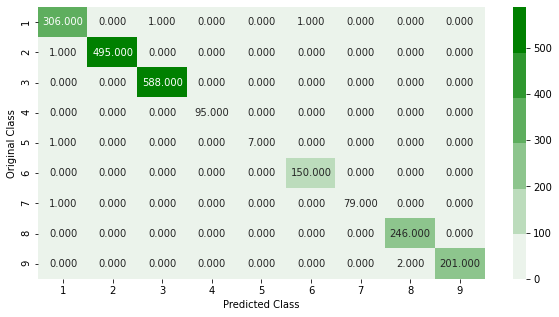

-------------------------------------------------- Precision matrix --------------------------------------------------


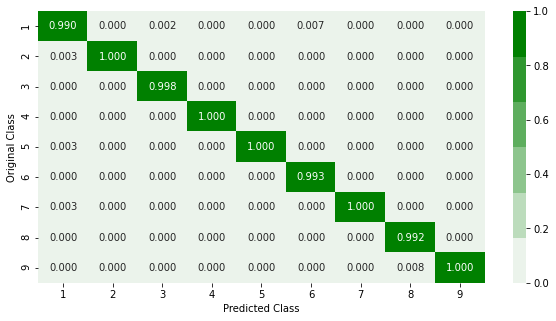

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


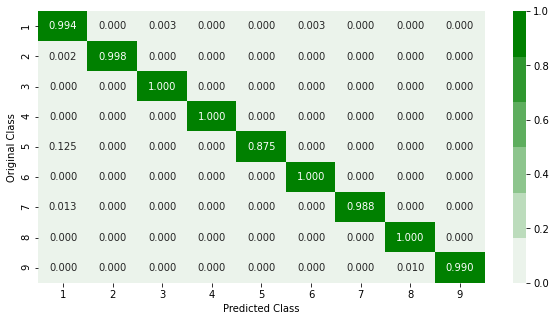

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

### 5.7.10 XGBoost Classifier

log_loss for c =  10 is 0.017081284572900274
log_loss for c =  50 is 0.008958555558440976
log_loss for c =  100 is 0.007554336713364476
log_loss for c =  500 is 0.007577005914827591
log_loss for c =  1000 is 0.007577754072671794
log_loss for c =  2000 is 0.007577981074158752
log_loss for c =  3000 is 0.007576874808058328


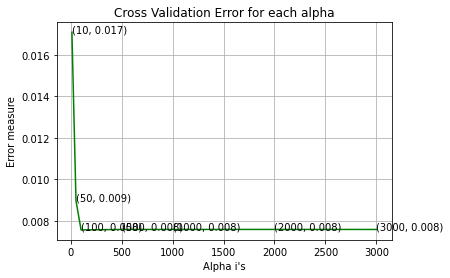

For values of best alpha =  100 The train log loss is: 0.007284142357685433
For values of best alpha =  100 The cross validation log loss is: 0.007554336713364476
For values of best alpha =  100 The test log loss is: 0.008746629455547598


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 140.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 156.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print(random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


For values of best alpha =  500 The train log loss is: 0.007200238316281682
For values of best alpha =  500 The cross validation log loss is: 0.00841184863743066
For values of best alpha =  500 The test log loss is: 0.011618293481079695
Number of misclassified points  0.09199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


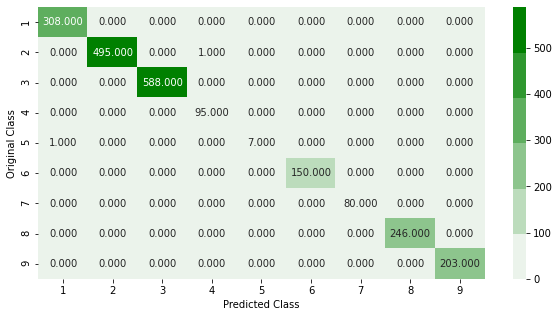

-------------------------------------------------- Precision matrix --------------------------------------------------


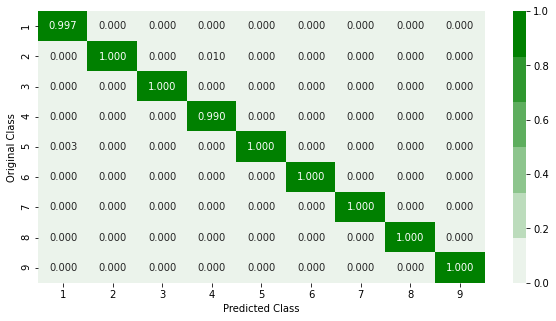

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


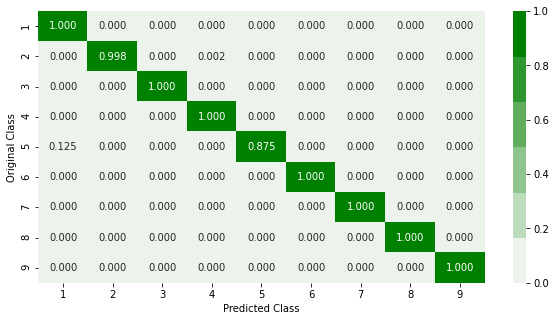

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.05,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

best_alpha = 500

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ',best_alpha, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ',best_alpha, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ',best_alpha, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

# 6. Conclusion

In [10]:
from prettytable import PrettyTable

x1 = PrettyTable()

x1.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x1.add_row(["Random Model", "N.A.", 88.2, 2.4739])
x1.add_row(["Random Forest Classifier", 10, 72.7, 1.9060])
x1.add_row(["XGBoostClassifier", 100, 72.7, 1.9059 ])
x1.add_row(["KNN", 13, 72.7, 1.9058 ])
x1.add_row(["Logistic Regression", 1000, 72.7, 1.9067])

x2 = PrettyTable()
x2.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x2.add_row(["Random Forest Classifier",500, 1.40, 0.0667])
x2.add_row(["XGBoost Classifier",500, 0.5, 0.0404])

x3 = PrettyTable()
x3.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x3.add_row(["Random Forest Classifier",500, 0.70, 0.0323])
x3.add_row(["XGBoost Classifier", 200, 0.40, 0.0298])

x4 = PrettyTable()
x4.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x4.add_row(["Random Forest Classifier", 500, 0.5, 0.0394])
x4.add_row(["XGBoost Classifier", 100, 0.4, 0.0269])

x5 = PrettyTable()
x5.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x5.add_row(["XGBoost Classifier",1000, 0.2, 0.0245])

x6 = PrettyTable()
x6.field_names = ["Model", "Hyperparameter", "# of misclassified points", "Test Log Loss"]
x6.add_row(["Random Forest Classifier", 50, 0.32, 0.0202])
x6.add_row(["XGBOOstClassifier", 500, 0.09, 0.0116])


print ("\033[1m"+"Data used:Byte files"+"\033[0m")
print(x1)
print("\n")

print ("\033[1m"+"Data used:ASM image+Bytes Unigram"+"\033[0m")
print(x2)
print("\n")

print("\033[1m"+"Data used:ASM image+Top 52 asm features"+"\033[0m")
print(x3)
print("\n")

print("\033[1m"+"Data used:Bytes unigram+top 52 asm features+ asm image features"+"\033[0m")
print(x4)
print("\n")

print("\033[1m"+"Data used:bytes unigram + 2000 bytes bigram + 800 ASM image features + top 52 asm features"+"\033[0m")
print(x5)
print("\n")

print("\033[1m"+"Data used:ASM image feature (10868 files)+bytes unigrams+top 52 ASM features"+"\033[0m")
print(x6)
print("\n")


Data used:Byte files
+--------------------------+----------------+---------------------------+---------------+
|          Model           | Hyperparameter | # of misclassified points | Test Log Loss |
+--------------------------+----------------+---------------------------+---------------+
|       Random Model       |      N.A.      |            88.2           |     2.4739    |
| Random Forest Classifier |       10       |            72.7           |     1.906     |
|    XGBoostClassifier     |      100       |            72.7           |     1.9059    |
|           KNN            |       13       |            72.7           |     1.9058    |
|   Logistic Regression    |      1000      |            72.7           |     1.9067    |
+--------------------------+----------------+---------------------------+---------------+


Data used:ASM image+Bytes Unigram
+--------------------------+----------------+---------------------------+---------------+
|          Model           | Hyperparameter

***Steps used in this assignment:***

1. For byte files, I have used 5000 byte files. This is because extracting bigrams for all the 10868 files takes a very long time and causes Google Colab to timeout.

2. XGBoost Classifier gave the best test log loss among all the machine learning models implemented on bytes bigrams data. However it was observed that a large number of points were being misclassified. 

3. Similarly I have extracted image features for only 5000 ASM files. I then combined the ASM image Features with bytes unigrams and used it for Random Forest Classifier and XGBoost Classifier. A marked improvement in the test log loss and number of misclassified points was observed with a best test log loss seen in XGboost Classifier model.

4. Combining ASM image features and top 52 ASM features results in a slight improvement in the number of misclassified points and considerable improvement in the test log loss using XGBoost Classifier model.

5. Using bytes unigram+top 52 asm features+ asm image features results in a slight improvement in test log loss but similar numbers in terms of number of points misclassified. Models used are Random Forest Classifier and XGBoost Classifier.

6. Using bytes unigram + 2000 bytes bigram + 800 ASM image features + top 52 asm features resulted in a very slight improvement in test log loss (0.0245 vs 0.0269) although number of miscalssified points is half of the result in the above mentioned approach. (0.2 vs 0.4). However despite using so mahy features we are yet not able to get the test lg loss to anywhere near 0.01

7. For this step I decided to extract the asm image faetures for all the 10868 files and combine them with bytes unigrams and top 52 ASM features. A marked improvement was seen in both test log loss and number of miscalssifed points using this approach.

**Resources used:**
https://github.com/dchad/malware-detection/tree/master/mmcc